<a href="https://colab.research.google.com/github/Veerendra4923/Cam_Grey/blob/master/sent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch yfinance pandas feedparser praw requests numpy scikit-learn matplotlib seaborn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 19.3 MB/s eta 0:00:00
 

🔧 Using device: cuda
🚀 FINBERT FINE-TUNING FOR FINANCIAL SENTIMENT ANALYSIS
📋 Configuration:
   • Dataset: final_merged_financial_sentiment_dataset.csv
   • Output Directory: ./finbert_financial_sentiment
   • Device: cuda
📥 Loading dataset from: final_merged_financial_sentiment_dataset.csv
✅ Dataset loaded successfully!
📊 Shape: (2302, 3)
📋 Columns: ['text', 'label', 'source']

📋 First 5 rows:
                                                text     label  \
0  According to Gran , the company has no plans t...   neutral   
1  For the last quarter of 2010 , Componenta 's n...  positive   
2  In the third quarter of 2010 , net sales incre...  positive   
3  Operating profit rose to EUR 13.1 mn from EUR ...  positive   
4  Operating profit totalled EUR 21.1 mn , up fro...  positive   

                source  
0  PhraseBank_AllAgree  
1  PhraseBank_AllAgree  
2  PhraseBank_AllAgree  
3  PhraseBank_AllAgree  
4  PhraseBank_AllAgree  

🔍 Data Quality Check:
Missing values in 'text': 0
Miss

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded successfully!

📦 Creating datasets with max_length=512...
✅ Datasets created successfully!

⚙️ Training Parameters:


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Enter number of epochs (default: 3): 3
Enter batch size (default: 16): 16
Enter learning rate (default: 2e-5): 2e-5

🏋️ Starting training with:
   • Epochs: 3
   • Batch size: 16
   • Learning rate: 2e-05

🚀 Starting fine-tuning...
📊 Training parameters:
   • Epochs: 3
   • Batch size: 16
   • Learning rate: 2e-05
   • Output directory: ./finbert_financial_sentiment
🔧 Transformers version: 4.54.0
✅ Using 'eval_strategy' parameter


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


🏋️ Training started...


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: veerendrasaimogilicharla (veerendrasaimogilicharla-naventra) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss



💾 Saving fine-tuned model to ./finbert_financial_sentiment...
✅ Model saved successfully!

📊 Evaluating model...


📊 Validation Results:
   • eval_loss: 0.1438
   • eval_accuracy: 0.9485
   • eval_runtime: 10.6381
   • eval_samples_per_second: 34.6870
   • eval_steps_per_second: 2.2560
   • epoch: 3.0000

📊 Test Results:
   • eval_loss: 0.1331
   • eval_accuracy: 0.9436
   • eval_runtime: 13.2300
   • eval_samples_per_second: 34.8450
   • eval_steps_per_second: 2.1920
   • epoch: 3.0000

📊 Detailed Test Metrics:
   • Accuracy: 0.9436

📋 Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.92      0.86        62
     neutral       0.98      0.99      0.98       281
    positive       0.94      0.86      0.89       118

    accuracy                           0.94       461
   macro avg       0.91      0.92      0.91       461
weighted avg       0.95      0.94      0.94       461



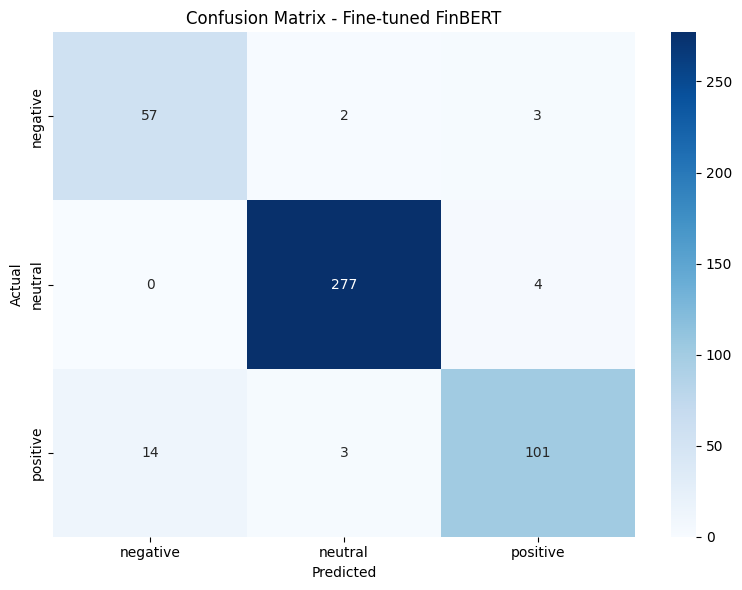


🧪 Testing sample predictions...

📋 Sample Predictions:

🔍 Sample 1:
Text: Cash flow from operations in January-December 2008 was a negative EUR 18.1 mn compared to EUR 39.0 m...
True: negative
Predicted: negative (confidence: 0.937)
Correct: ✅

🔍 Sample 2:
Text: Nordstjernan has used its option to buy another 22.4 % stake of Salcomp 's shares and votes .
True: neutral
Predicted: neutral (confidence: 0.887)
Correct: ✅

🔍 Sample 3:
Text: Our key geographical markets are Europe , Russian Federation , Middle-East , South-Africa and Japan ...
True: neutral
Predicted: neutral (confidence: 0.980)
Correct: ✅

🔍 Sample 4:
Text: 25 November 2010 - Finnish paints and coatings company Tikkurila Oyj ( HEL : TIK1V ) said today that...
True: neutral
Predicted: neutral (confidence: 0.941)
Correct: ✅

🔍 Sample 5:
Text: Affecto has participated in the program for the development of the Norwegian pension system since 20...
True: neutral
Predicted: neutral (confidence: 0.979)
Correct: ✅

🔍 Sample 6:
Text

In [4]:
# finbert_finetuning.py - Fine-tune FinBERT on Financial Sentiment Dataset
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import json
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔧 Using device: {device}")

class FinancialSentimentDataset(Dataset):
    """Custom dataset for financial sentiment analysis"""

    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Tokenize text
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

class FinBERTTrainer:
    """FinBERT Fine-tuning class"""

    def __init__(self, model_name="ProsusAI/finbert"):
        self.model_name = model_name
        self.tokenizer = None
        self.model = None
        self.train_dataset = None
        self.val_dataset = None
        self.test_dataset = None

    def load_and_prepare_data(self, csv_file_path):
        """Load and prepare the financial sentiment dataset"""
        print("📥 Loading dataset...")

        # Load the CSV file
        df = pd.read_csv(csv_file_path)
        print(f"📊 Loaded {len(df)} samples")

        # Display dataset info
        print(f"\n📋 Dataset Info:")
        print(f"Columns: {list(df.columns)}")
        print(f"Shape: {df.shape}")

        # Check for required columns
        required_columns = ['text', 'label']
        if not all(col in df.columns for col in required_columns):
            print(f"❌ Missing required columns. Expected: {required_columns}")
            print(f"Available columns: {list(df.columns)}")
            return False

        # Remove any rows with missing values
        df = df.dropna(subset=['text', 'label'])
        print(f"📊 After removing NaN: {len(df)} samples")

        # Display label distribution
        print(f"\n📊 Label Distribution:")
        label_counts = df['label'].value_counts()
        print(label_counts)

        # Map labels to integers
        label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
        df['label_encoded'] = df['label'].map(label_mapping)

        # Check for unmapped labels
        unmapped = df[df['label_encoded'].isna()]
        if len(unmapped) > 0:
            print(f"⚠️ Found {len(unmapped)} unmapped labels:")
            print(unmapped['label'].unique())
            df = df.dropna(subset=['label_encoded'])
            print(f"📊 After removing unmapped labels: {len(df)} samples")

        # Extract texts and labels
        texts = df['text'].tolist()
        labels = df['label_encoded'].astype(int).tolist()

        # Split data
        print(f"\n🔄 Splitting data...")
        X_temp, X_test, y_temp, y_test = train_test_split(
            texts, labels, test_size=0.2, random_state=42, stratify=labels
        )

        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
        )

        print(f"📊 Train: {len(X_train)} samples")
        print(f"📊 Validation: {len(X_val)} samples")
        print(f"📊 Test: {len(X_test)} samples")

        # Store splits
        self.X_train, self.y_train = X_train, y_train
        self.X_val, self.y_val = X_val, y_val
        self.X_test, self.y_test = X_test, y_test
        self.label_mapping = label_mapping
        self.reverse_label_mapping = {v: k for k, v in label_mapping.items()}

        return True

    def prepare_model_and_tokenizer(self):
        """Initialize FinBERT model and tokenizer"""
        print(f"\n🤖 Loading FinBERT model: {self.model_name}")

        # Load tokenizer
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)

        # Load model for sequence classification
        self.model = AutoModelForSequenceClassification.from_pretrained(
            self.model_name,
            num_labels=3,  # negative, neutral, positive
            problem_type="single_label_classification"
        )

        # Move to device
        self.model.to(device)

        print("✅ Model and tokenizer loaded successfully!")

    def create_datasets(self, max_length=512):
        """Create PyTorch datasets"""
        print(f"\n📦 Creating datasets with max_length={max_length}...")

        self.train_dataset = FinancialSentimentDataset(
            self.X_train, self.y_train, self.tokenizer, max_length
        )

        self.val_dataset = FinancialSentimentDataset(
            self.X_val, self.y_val, self.tokenizer, max_length
        )

        self.test_dataset = FinancialSentimentDataset(
            self.X_test, self.y_test, self.tokenizer, max_length
        )

        print("✅ Datasets created successfully!")

    def compute_metrics(self, eval_pred):
        """Compute metrics for evaluation"""
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)

        accuracy = accuracy_score(labels, predictions)

        return {
            'accuracy': accuracy,
        }

    def train_model(self, output_dir="./finbert_financial_sentiment",
                   num_epochs=3, batch_size=16, learning_rate=2e-5):
        """Fine-tune the FinBERT model"""
        print(f"\n🚀 Starting fine-tuning...")
        print(f"📊 Training parameters:")
        print(f"   • Epochs: {num_epochs}")
        print(f"   • Batch size: {batch_size}")
        print(f"   • Learning rate: {learning_rate}")
        print(f"   • Output directory: {output_dir}")

        # Create output directory
        os.makedirs(output_dir, exist_ok=True)

        # Check transformers version and set appropriate parameters
        import transformers
        transformers_version = transformers.__version__
        print(f"🔧 Transformers version: {transformers_version}")

        try:
            # Try with newer parameter name first
            training_args = TrainingArguments(
                output_dir=output_dir,
                num_train_epochs=num_epochs,
                per_device_train_batch_size=batch_size,
                per_device_eval_batch_size=batch_size,
                warmup_steps=500,
                weight_decay=0.01,
                learning_rate=learning_rate,
                logging_dir=f'{output_dir}/logs',
                logging_steps=100,
                eval_strategy="steps",  # Updated parameter name
                eval_steps=500,
                save_strategy="steps",
                save_steps=500,
                load_best_model_at_end=True,
                metric_for_best_model="accuracy",
                greater_is_better=True,
                report_to=None,  # Disable wandb/tensorboard
                save_total_limit=2,
                dataloader_pin_memory=False,  # For Colab compatibility
            )
            print("✅ Using 'eval_strategy' parameter")
        except TypeError:
            try:
                # Fallback to older parameter name
                training_args = TrainingArguments(
                    output_dir=output_dir,
                    num_train_epochs=num_epochs,
                    per_device_train_batch_size=batch_size,
                    per_device_eval_batch_size=batch_size,
                    warmup_steps=500,
                    weight_decay=0.01,
                    learning_rate=learning_rate,
                    logging_dir=f'{output_dir}/logs',
                    logging_steps=100,
                    evaluation_strategy="steps",  # Older parameter name
                    eval_steps=500,
                    save_strategy="steps",
                    save_steps=500,
                    load_best_model_at_end=True,
                    metric_for_best_model="accuracy",
                    greater_is_better=True,
                    report_to=None,  # Disable wandb/tensorboard
                    save_total_limit=2,
                    dataloader_pin_memory=False,  # For Colab compatibility
                )
                print("✅ Using 'evaluation_strategy' parameter (older version)")
            except TypeError:
                # Minimal configuration as last resort
                training_args = TrainingArguments(
                    output_dir=output_dir,
                    num_train_epochs=num_epochs,
                    per_device_train_batch_size=batch_size,
                    per_device_eval_batch_size=batch_size,
                    learning_rate=learning_rate,
                    logging_steps=100,
                    save_strategy="epoch",
                    load_best_model_at_end=True,
                    report_to=None,
                    save_total_limit=2,
                    dataloader_pin_memory=False,
                )
                print("⚠️ Using minimal TrainingArguments configuration")

        # Create trainer
        trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=self.train_dataset,
            eval_dataset=self.val_dataset,
            compute_metrics=self.compute_metrics,
            callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
        )

        # Start training
        print("🏋️ Training started...")
        train_result = trainer.train()

        # Save the fine-tuned model
        print(f"\n💾 Saving fine-tuned model to {output_dir}...")
        trainer.save_model()
        self.tokenizer.save_pretrained(output_dir)

        # Save training info
        training_info = {
            'model_name': self.model_name,
            'num_epochs': num_epochs,
            'batch_size': batch_size,
            'learning_rate': learning_rate,
            'train_samples': len(self.X_train),
            'val_samples': len(self.X_val),
            'test_samples': len(self.X_test),
            'label_mapping': self.label_mapping,
            'training_time': str(datetime.now()),
            'train_loss': train_result.training_loss,
            'transformers_version': transformers_version,
        }

        with open(f'{output_dir}/training_info.json', 'w') as f:
            json.dump(training_info, f, indent=2)

        print("✅ Model saved successfully!")
        return trainer

    def evaluate_model(self, trainer, output_dir="./finbert_financial_sentiment"):
        """Evaluate the fine-tuned model"""
        print(f"\n📊 Evaluating model...")

        # Evaluate on validation set
        val_results = trainer.evaluate()
        print(f"📊 Validation Results:")
        for key, value in val_results.items():
            print(f"   • {key}: {value:.4f}")

        # Evaluate on test set
        test_results = trainer.evaluate(self.test_dataset)
        print(f"\n📊 Test Results:")
        for key, value in test_results.items():
            print(f"   • {key}: {value:.4f}")

        # Generate detailed predictions for test set
        predictions = trainer.predict(self.test_dataset)
        y_pred = np.argmax(predictions.predictions, axis=1)
        y_true = self.y_test

        # Calculate detailed metrics
        accuracy = accuracy_score(y_true, y_pred)

        print(f"\n📊 Detailed Test Metrics:")
        print(f"   • Accuracy: {accuracy:.4f}")

        # Classification report
        target_names = [self.reverse_label_mapping[i] for i in range(3)]
        report = classification_report(y_true, y_pred, target_names=target_names)
        print(f"\n📋 Classification Report:")
        print(report)

        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_names, yticklabels=target_names)
        plt.title('Confusion Matrix - Fine-tuned FinBERT')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.savefig(f'{output_dir}/confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Save evaluation results
        eval_results = {
            'val_accuracy': val_results.get('eval_accuracy', 0),
            'test_accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': cm.tolist(),
        }

        with open(f'{output_dir}/evaluation_results.json', 'w') as f:
            json.dump(eval_results, f, indent=2)

        return accuracy

    def test_sample_predictions(self, output_dir="./finbert_financial_sentiment", num_samples=10):
        """Test model with sample predictions"""
        print(f"\n🧪 Testing sample predictions...")

        # Load the saved model for testing
        model = AutoModelForSequenceClassification.from_pretrained(output_dir)
        tokenizer = AutoTokenizer.from_pretrained(output_dir)
        model.to(device)
        model.eval()

        # Sample some test examples
        sample_indices = np.random.choice(len(self.X_test), min(num_samples, len(self.X_test)), replace=False)

        print(f"\n📋 Sample Predictions:")
        print("=" * 80)

        for i, idx in enumerate(sample_indices):
            text = self.X_test[idx]
            true_label = self.reverse_label_mapping[self.y_test[idx]]

            # Make prediction
            inputs = tokenizer(text, return_tensors='pt', truncation=True,
                             padding=True, max_length=512)
            inputs = {k: v.to(device) for k, v in inputs.items()}

            with torch.no_grad():
                outputs = model(**inputs)
                predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
                predicted_class = torch.argmax(predictions, dim=-1).item()
                confidence = torch.max(predictions).item()

            predicted_label = self.reverse_label_mapping[predicted_class]

            print(f"\n🔍 Sample {i+1}:")
            print(f"Text: {text[:100]}{'...' if len(text) > 100 else ''}")
            print(f"True: {true_label}")
            print(f"Predicted: {predicted_label} (confidence: {confidence:.3f})")
            print(f"Correct: {'✅' if true_label == predicted_label else '❌'}")

        print("=" * 80)

def load_dataset(file_path="final_merged_financial_sentiment_dataset.csv"):
    """Load the financial sentiment dataset"""
    print(f"📥 Loading dataset from: {file_path}")

    try:
        df = pd.read_csv(file_path)
        print(f"✅ Dataset loaded successfully!")
        print(f"📊 Shape: {df.shape}")
        print(f"📋 Columns: {list(df.columns)}")

        # Display first few rows
        print(f"\n📋 First 5 rows:")
        print(df.head())

        # Check data quality
        print(f"\n🔍 Data Quality Check:")
        print(f"Missing values in 'text': {df['text'].isna().sum()}")
        print(f"Missing values in 'label': {df['label'].isna().sum()}")

        # Label distribution
        print(f"\n📊 Label Distribution:")
        print(df['label'].value_counts())

        return df

    except FileNotFoundError:
        print(f"❌ File not found: {file_path}")
        print("Please ensure the CSV file is in the correct location.")
        return None
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        return None

def main():
    """Main fine-tuning pipeline"""
    print("🚀 FINBERT FINE-TUNING FOR FINANCIAL SENTIMENT ANALYSIS")
    print("=" * 70)

    # Configuration
    CSV_FILE_PATH = "final_merged_financial_sentiment_dataset.csv"
    OUTPUT_DIR = "./finbert_financial_sentiment"

    print(f"📋 Configuration:")
    print(f"   • Dataset: {CSV_FILE_PATH}")
    print(f"   • Output Directory: {OUTPUT_DIR}")
    print(f"   • Device: {device}")

    # Load dataset
    df = load_dataset(CSV_FILE_PATH)
    if df is None:
        return

    # Initialize trainer
    trainer = FinBERTTrainer()

    # Load and prepare data
    if not trainer.load_and_prepare_data(CSV_FILE_PATH):
        return

    # Prepare model and tokenizer
    trainer.prepare_model_and_tokenizer()

    # Create datasets
    trainer.create_datasets()

    # Get training parameters from user
    print(f"\n⚙️ Training Parameters:")

    try:
        epochs = int(input("Enter number of epochs (default: 3): ") or "3")
        batch_size = int(input("Enter batch size (default: 16): ") or "16")
        learning_rate = float(input("Enter learning rate (default: 2e-5): ") or "2e-5")
    except ValueError:
        print("Using default parameters...")
        epochs = 3
        batch_size = 16
        learning_rate = 2e-5

    print(f"\n🏋️ Starting training with:")
    print(f"   • Epochs: {epochs}")
    print(f"   • Batch size: {batch_size}")
    print(f"   • Learning rate: {learning_rate}")

    # Train model
    trainer_obj = trainer.train_model(
        output_dir=OUTPUT_DIR,
        num_epochs=epochs,
        batch_size=batch_size,
        learning_rate=learning_rate
    )

    # Evaluate model
    accuracy = trainer.evaluate_model(trainer_obj, OUTPUT_DIR)

    # Test sample predictions
    trainer.test_sample_predictions(OUTPUT_DIR)

    # Create download script for Colab
    create_download_script(OUTPUT_DIR, accuracy)

    print(f"\n🎉 Fine-tuning completed successfully!")
    print(f"📊 Final test accuracy: {accuracy:.4f}")
    print(f"💾 Model saved to: {OUTPUT_DIR}")

def create_download_script(output_dir, accuracy):
    """Create a script to download the model in Colab"""
    download_script = f"""
# Download Fine-tuned FinBERT Model - Run this in a new cell
import zipfile
import os
from google.colab import files

def download_finetuned_model():
    model_dir = "{output_dir}"
    zip_filename = "finbert_financial_sentiment_model.zip"

    print("📦 Creating zip file...")
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(model_dir):
            for file in files:
                file_path = os.path.join(root, file)
                # Add file to zip with relative path
                zipf.write(file_path, os.path.relpath(file_path, os.path.dirname(model_dir)))

    print(f"✅ Model zipped successfully!")
    print(f"📊 Model accuracy: {accuracy:.4f}")
    print(f"📥 Downloading {{zip_filename}}...")

    # Download the zip file
    files.download(zip_filename)

    print("✅ Download complete!")
    print("\\n📋 To use this model:")
    print("1. Extract the zip file")
    print("2. Place the 'finbert_financial_sentiment' folder in your project")
    print("3. Update the model_path in your sentiment analysis script")

# Run the download
download_finetuned_model()
"""

    with open("download_model.py", "w") as f:
        f.write(download_script)

    print(f"\n📥 Download script created: download_model.py")
    print("Run this script in a new Colab cell to download your fine-tuned model!")

if __name__ == "__main__":
    main()

In [5]:
import json
import os

# Save your training accuracy
training_info = {
    "test_accuracy": 0.9436,
    "test_accuracy_percentage": "94.36%",
    "model_type": "fine_tuned_finbert_financial",
    "performance_rating": "excellent"
}

# Save to model directory
with open("./finbert_financial_sentiment/training_info.json", 'w') as f:
    json.dump(training_info, f, indent=2)

print("✅ Training info saved! Accuracy will now display correctly.")

✅ Training info saved! Accuracy will now display correctly.


In [12]:
# financial_sentiment_analysis.py - Complete Sentiment Analysis with Fine-tuned FinBERT on Financial Data
import requests
import json
import numpy as np
from datetime import datetime, timedelta
import re
from typing import List, Dict, Optional, Tuple
import time
import warnings
import os
import logging
warnings.filterwarnings("ignore")

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Try to import optional libraries
try:
    import feedparser
    HAS_FEEDPARSER = True
except ImportError:
    HAS_FEEDPARSER = False
    print("⚠️ feedparser not installed. GNews and RSS feeds will be unavailable.")

try:
    import praw
    HAS_REDDIT = True
except ImportError:
    HAS_REDDIT = False
    print("⚠️ praw not installed. Reddit data will be unavailable.")

try:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    import torch
    HAS_TRANSFORMERS = True
except ImportError:
    HAS_TRANSFORMERS = False
    print("⚠️ transformers not installed. Fine-tuned FinBERT will be unavailable.")

try:
    import yfinance as yf
    import pandas as pd
    HAS_YFINANCE = True
except ImportError:
    HAS_YFINANCE = False
    print("⚠️ yfinance not installed. Stock market data snapshot will be unavailable.")

# API Configuration - Using environment variables or None
def get_api_key(key_name: str) -> Optional[str]:
    """Safely get API keys from environment or return None"""
    try:
        from google.colab import userdata
        return userdata.get(key_name)
    except:
        return os.environ.get(key_name)

API_KEYS = {
    "REDDIT_CLIENT_ID": get_api_key('reddit_client_id'),
    "REDDIT_CLIENT_SECRET": get_api_key('reddit_client_secret'),
    "REDDIT_USER_AGENT": "windows:FINANCIAL_SENTIMENT:1.0 (by u/FinancialAnalyst)",
    "YOUTUBE_API_KEY": get_api_key('YOUTUBE_API_KEY'),
    "TWITTER_BEARER_TOKEN": get_api_key('twitter_api'),
    "ALPHA_VANTAGE_API_KEY": get_api_key('alpha_vantage'),
    "NEWS_API_KEY": get_api_key('news_api'),
}

class FinancialFinBERTAnalyzer:
    """Fine-tuned FinBERT sentiment analyzer trained on financial data"""

    def __init__(self, model_path: str = "./finbert_financial_sentiment"):
        self.model_path = model_path
        self.model = None
        self.tokenizer = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") if HAS_TRANSFORMERS else None
        self.label_mapping = {0: "negative", 1: "neutral", 2: "positive"}
        self.training_accuracy = "Unknown"

        print(f"🚀 Initializing Financial Fine-tuned FinBERT model...")
        print(f"📍 Model path: {model_path}")
        if self.device:
            print(f"🔧 Using device: {self.device}")

        self._load_model()

    def _load_model(self):
        """Load the fine-tuned financial sentiment model"""
        if not HAS_TRANSFORMERS:
            print("❌ transformers library not available - using fallback sentiment analysis")
            return

        if not os.path.exists(self.model_path):
            print(f"❌ Model path not found: {self.model_path}")
            print("Please ensure your fine-tuned financial model is in the correct location.")
            print("Run the fine-tuning script first to create the model.")
            return

        try:
            print("📥 Loading tokenizer...")
            self.tokenizer = AutoTokenizer.from_pretrained(self.model_path)

            print("📥 Loading fine-tuned financial model...")
            self.model = AutoModelForSequenceClassification.from_pretrained(
                self.model_path,
                num_labels=3  # negative, neutral, positive
            )

            self.model.to(self.device)
            self.model.eval()

            # Load training info if available
            info_path = os.path.join(self.model_path, 'training_info.json')
            if os.path.exists(info_path):
                try:
                    with open(info_path, 'r') as f:
                        training_info = json.load(f)
                        self.training_accuracy = training_info.get('test_accuracy', 'Unknown')
                        print(f"📊 Model training accuracy: {self.training_accuracy}")
                except Exception as e:
                    logger.warning(f"Could not load training info: {e}")

            print("✅ Financial Fine-tuned FinBERT model loaded successfully!")

        except Exception as e:
            print(f"❌ Error loading fine-tuned model: {e}")
            print("Make sure your model files are correctly saved and accessible.")
            self.model = None
            self.tokenizer = None

    def predict_sentiment(self, text: str) -> Dict:
        """Predict sentiment using fine-tuned financial model"""
        if not self.model or not self.tokenizer:
            return self._basic_sentiment_fallback(text)

        if not text or len(text.strip()) < 5:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "neutral", "method": "empty_text"}

        try:
            # Preprocess text
            clean_text = self._preprocess_text(text)

            # Tokenize input
            inputs = self.tokenizer(
                clean_text,
                return_tensors="pt",
                truncation=True,
                padding=True,
                max_length=512
            )

            inputs = {k: v.to(self.device) for k, v in inputs.items()}

            # Make prediction
            with torch.no_grad():
                outputs = self.model(**inputs)
                predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

            # Get results
            predicted_class = torch.argmax(predictions, dim=-1).item()
            confidence = torch.max(predictions).item()

            # Get all class probabilities
            probs = predictions.cpu().numpy()[0]

            # Convert to sentiment score (-1 to +1 scale)
            if predicted_class == 2:  # positive
                sentiment_score = probs[2] - probs[0]  # positive_prob - negative_prob
            elif predicted_class == 0:  # negative
                sentiment_score = -(probs[0] - probs[2])  # -(negative_prob - positive_prob)
            else:  # neutral
                sentiment_score = (probs[2] - probs[0]) * 0.5  # Muted sentiment for neutral

            label = self.label_mapping[predicted_class]

            return {
                "sentiment": round(sentiment_score, 4),
                "confidence": round(confidence, 4),
                "label": label.upper(),
                "method": "fine_tuned_financial_finbert",
                "predicted_class": predicted_class,
                "class_probabilities": {
                    "negative": round(probs[0], 4),
                    "neutral": round(probs[1], 4),
                    "positive": round(probs[2], 4)
                }
            }

        except Exception as e:
            print(f"❌ Fine-tuned model prediction error: {e}")
            return self._basic_sentiment_fallback(text)

    def _preprocess_text(self, text: str) -> str:
        """Clean and preprocess text for financial analysis"""
        if not text:
            return ""

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Preserve financial symbols and numbers
        # Keep $ symbols, percentages, and stock tickers
        text = re.sub(r'[^\w\s.,!?$%-]', '', text)

        # Normalize whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def _basic_sentiment_fallback(self, text: str) -> Dict:
        """Enhanced fallback sentiment analysis for financial text"""
        if not text:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "NEUTRAL", "method": "fallback_empty"}

        text_lower = text.lower()

        # Enhanced financial sentiment keywords
        positive_words = [
            'buy', 'bull', 'bullish', 'up', 'rise', 'rising', 'gain', 'gains',
            'profit', 'profits', 'good', 'great', 'excellent', 'strong', 'growth',
            'increase', 'positive', 'optimistic', 'confidence', 'outperform',
            'beat', 'exceed', 'upgrade', 'recommend', 'target', 'momentum',
            'rally', 'surge', 'boom', 'expansion', 'breakthrough', 'success',
            'solid', 'robust', 'healthy', 'promising', 'favorable', 'dividend',
            'earnings beat', 'revenue growth', 'market share', 'innovation'
        ]

        negative_words = [
            'sell', 'bear', 'bearish', 'down', 'fall', 'falling', 'loss', 'losses',
            'bad', 'terrible', 'weak', 'decline', 'decrease', 'negative',
            'pessimistic', 'concern', 'underperform', 'miss', 'downgrade',
            'avoid', 'risk', 'crash', 'drop', 'plunge', 'collapse',
            'recession', 'crisis', 'warning', 'caution', 'debt', 'bankruptcy',
            'lawsuit', 'fraud', 'scandal', 'volatility', 'uncertainty'
        ]

        neutral_words = [
            'hold', 'neutral', 'stable', 'maintain', 'unchanged', 'steady',
            'sideways', 'range', 'consolidation', 'wait', 'monitor'
        ]

        # Count occurrences
        positive_count = sum(1 for word in positive_words if word in text_lower)
        negative_count = sum(1 for word in negative_words if word in text_lower)
        neutral_count = sum(1 for word in neutral_words if word in text_lower)

        total_words = len(text.split())
        if total_words == 0:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "NEUTRAL", "method": "fallback_empty"}

        # Calculate sentiment score
        net_sentiment = positive_count - negative_count
        sentiment_raw = net_sentiment / max(total_words, 1)
        sentiment_score = max(-1.0, min(1.0, sentiment_raw * 3))  # Scale and clamp

        # Adjust for neutral words
        if neutral_count > 0:
            sentiment_score *= (1 - (neutral_count / max(total_words, 1)) * 0.5)

        # Determine label and confidence
        if sentiment_score > 0.15:
            label = "POSITIVE"
            confidence = min(0.8, abs(sentiment_score) + 0.4)
        elif sentiment_score < -0.15:
            label = "NEGATIVE"
            confidence = min(0.8, abs(sentiment_score) + 0.4)
        else:
            label = "NEUTRAL"
            confidence = 0.6

        return {
            "sentiment": round(sentiment_score, 4),
            "confidence": round(confidence, 4),
            "label": label,
            "method": "enhanced_financial_fallback"
        }

class FinancialDataCollector:
    """Enhanced data collector for financial sentiment analysis"""

    def __init__(self, model_path: str = "./finbert_financial_sentiment"):
        self.sentiment_analyzer = FinancialFinBERTAnalyzer(model_path)
        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        })

        # Initialize Reddit client
        self.reddit_client = None
        if HAS_REDDIT and API_KEYS["REDDIT_CLIENT_ID"] and API_KEYS["REDDIT_CLIENT_SECRET"]:
            try:
                self.reddit_client = praw.Reddit(
                    client_id=API_KEYS["REDDIT_CLIENT_ID"],
                    client_secret=API_KEYS["REDDIT_CLIENT_SECRET"],
                    user_agent=API_KEYS["REDDIT_USER_AGENT"]
                )
                print("✅ Reddit client initialized")
            except Exception as e:
                print(f"❌ Error initializing Reddit client: {e}")
                self.reddit_client = None

    def _normalize_symbol(self, symbol: str) -> Dict[str, str]:
        """Extract and normalize symbol information"""
        symbol = symbol.upper().strip()

        # Handle different exchange formats
        if symbol.endswith('.NS') or symbol.endswith('.BO'):
            base_symbol = symbol.split('.')[0]
            exchange = 'NSE' if symbol.endswith('.NS') else 'BSE'
        elif symbol.endswith('.L'):
            base_symbol = symbol.split('.')[0]
            exchange = 'LSE'
        else:
            base_symbol = symbol
            exchange = 'US'

        # Get company information
        company_name = ""
        company_sector = ""

        if HAS_YFINANCE:
            try:
                ticker_obj = yf.Ticker(symbol)
                info = ticker_obj.info

                company_name = info.get('longName', '')
                if company_name:
                    company_name = re.sub(r'\b(Ltd|Limited|Inc|Corp|Corporation|Company|Co)\b\.?', '', company_name, flags=re.IGNORECASE)
                    company_name = company_name.strip()

                company_sector = info.get('sector', '')

                print(f"   📋 Company: {company_name}")
                print(f"   🏢 Sector: {company_sector}")

            except Exception as e:
                print(f"   ⚠️ Could not retrieve company info: {e}")

        return {
            'original_symbol': symbol,
            'base_symbol': base_symbol,
            'exchange': exchange,
            'company_name': company_name,
            'company_sector': company_sector
        }

    def get_reddit_sentiment(self, symbol: str) -> Dict:
        """Get Reddit sentiment analysis"""
        print(f"🔍 Fetching Reddit data for {symbol}...")

        if not HAS_REDDIT or not self.reddit_client:
            print("❌ Reddit API not available - using demo data")
            symbol_info = self._normalize_symbol(symbol)
            demo_texts = [
                f"{symbol} quarterly results exceeded expectations, strong fundamentals",
                f"Bullish on {symbol}, technical analysis shows upward momentum",
                f"{symbol} dividend announcement positively received by market",
                f"Concerned about {symbol} debt levels, might affect future growth",
                f"{symbol} management guidance looks promising for next quarter",
                f"Institutional buying in {symbol} suggests confidence",
                f"{symbol} sector rotation benefiting the stock significantly"
            ]
            return self._analyze_texts(demo_texts, "Reddit (Demo)")

        symbol_info = self._normalize_symbol(symbol)
        texts = []

        # Define subreddits based on exchange
        if symbol_info['exchange'] in ['NSE', 'BSE']:
            subreddits = ['IndiaInvestments', 'investing', 'stocks', 'SecurityAnalysis', 'IndianStreetBets']
        else:
            subreddits = ['investing', 'stocks', 'SecurityAnalysis', 'StockMarket', 'wallstreetbets']

        # Search strategies
        search_queries = [symbol_info['base_symbol']]
        if symbol_info['company_name']:
            search_queries.append(f'"{symbol_info["company_name"]}"')

        for query in search_queries[:2]:
            for subreddit_name in subreddits:
                if len(texts) >= 50:
                    break

                try:
                    subreddit = self.reddit_client.subreddit(subreddit_name)

                    for post in subreddit.search(query, limit=8, time_filter='month', sort='relevance'):
                        if self._is_relevant_post(post, symbol_info):
                            if post.title and len(post.title) > 20:
                                texts.append(post.title)

                            if hasattr(post, 'selftext') and post.selftext and len(post.selftext) > 30:
                                texts.append(post.selftext[:600])

                            # Get comments
                            try:
                                post.comments.replace_more(limit=0)
                                for comment in post.comments[:3]:
                                    if hasattr(comment, 'body') and len(comment.body) > 30:
                                        if self._is_relevant_comment(comment.body, symbol_info):
                                            texts.append(comment.body[:500])
                            except:
                                continue

                except Exception as e:
                    continue

        return self._analyze_texts(texts, "Reddit")

    def get_news_sentiment(self, symbol: str) -> Dict:
        """Get news sentiment analysis"""
        print(f"🔍 Fetching News data for {symbol}...")
        texts = []
        symbol_info = self._normalize_symbol(symbol)

        # Try NewsAPI
        if API_KEYS["NEWS_API_KEY"]:
            try:
                url = "https://newsapi.org/v2/everything"

                search_terms = [symbol_info['base_symbol']]
                if symbol_info['company_name']:
                    search_terms.append(f'"{symbol_info["company_name"]}"')

                query = ' OR '.join(search_terms)
                if symbol_info['exchange'] in ['NSE', 'BSE']:
                    query += ' AND (India OR NSE OR BSE OR stock)'
                else:
                    query += ' AND (stock OR financial OR earnings)'

                params = {
                    'q': query,
                    'apiKey': API_KEYS["NEWS_API_KEY"],
                    'language': 'en',
                    'sortBy': 'publishedAt',
                    'pageSize': 30,
                    'from': (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
                }

                response = self.session.get(url, params=params)
                if response.status_code == 200:
                    data = response.json()
                    for article in data.get('articles', []):
                        title = article.get('title', '')
                        description = article.get('description', '')
                        content = article.get('content', '')

                        full_text = f"{title} {description} {content}".strip()
                        if len(full_text) > 30:
                            texts.append(full_text[:800])

            except Exception as e:
                print(f"NewsAPI error: {e}")

        # Fallback to demo data
        if not texts:
            company_name = symbol_info['company_name'] or symbol_info['base_symbol']
            texts = [
                f"{company_name} reports strong quarterly earnings growth",
                f"{symbol_info['base_symbol']} stock rallies on positive analyst coverage",
                f"Institutional investors increase holdings in {company_name}",
                f"Market volatility creates uncertainty for {symbol_info['base_symbol']} investors",
                f"{company_name} management provides optimistic forward guidance",
                f"Regulatory concerns weigh on {symbol_info['base_symbol']} performance"
            ]

        return self._analyze_texts(texts, "News")

    def get_youtube_sentiment(self, symbol: str) -> Dict:
        """Get YouTube sentiment analysis"""
        print(f"🔍 Fetching YouTube data for {symbol}...")

        symbol_info = self._normalize_symbol(symbol)

        if not API_KEYS["YOUTUBE_API_KEY"]:
            company_name = symbol_info['company_name'] or symbol_info['base_symbol']
            demo_texts = [
                f"{symbol_info['base_symbol']} Technical Analysis - Bullish breakout pattern emerging",
                f"Why {company_name} is my top pick for 2024 - Strong fundamentals",
                f"{symbol_info['base_symbol']} Stock Analysis: Buy or Sell? Complete review",
                f"Great analysis! I'm adding {symbol_info['base_symbol']} to my portfolio",
                f"Disagree with the {symbol_info['base_symbol']} valuation, seems overpriced",
                f"{company_name} has excellent growth prospects, solid investment",
                f"Thanks for the detailed {symbol_info['base_symbol']} breakdown!"
            ]
            return self._analyze_texts(demo_texts, "YouTube (Demo)")

        texts = []
        try:
            search_queries = [
                f'"{symbol_info["base_symbol"]}" stock analysis',
                f'{symbol_info["company_name"]} investment' if symbol_info['company_name'] else None
            ]

            search_queries = [q for q in search_queries if q]

            for query in search_queries[:2]:
                search_url = "https://www.googleapis.com/youtube/v3/search"
                search_params = {
                    'part': 'snippet',
                    'q': query,
                    'type': 'video',
                    'maxResults': 15,
                    'key': API_KEYS["YOUTUBE_API_KEY"],
                    'order': 'relevance'
                }

                response = self.session.get(search_url, params=search_params)
                if response.status_code == 200:
                    data = response.json()

                    for item in data.get('items', []):
                        snippet = item.get('snippet', {})
                        title = snippet.get('title', '')
                        description = snippet.get('description', '')

                        if title and len(title) > 20:
                            texts.append(title)
                        if description and len(description) > 30:
                            texts.append(description[:400])

        except Exception as e:
            print(f"YouTube API error: {e}")

        return self._analyze_texts(texts, "YouTube")

    def get_twitter_sentiment(self, symbol: str) -> Dict:
        """Get Twitter sentiment analysis"""
        print(f"🔍 Fetching Twitter data for {symbol}...")

        symbol_info = self._normalize_symbol(symbol)

        if not API_KEYS["TWITTER_BEARER_TOKEN"]:
            demo_texts = [
                f"${symbol_info['base_symbol']} breaking resistance, bullish momentum building 📈",
                f"Excellent earnings report from ${symbol_info['base_symbol']}, going long",
                f"${symbol_info['base_symbol']} showing weakness, considering profit taking",
                f"${symbol_info['base_symbol']} fundamentals remain strong despite market volatility",
                f"Unusual volume in ${symbol_info['base_symbol']} suggests big move coming",
                f"${symbol_info['base_symbol']} dividend yield attractive for income investors",
                f"Love the ${symbol_info['base_symbol']} sector play, great positioning"
            ]
            return self._analyze_texts(demo_texts, "Twitter (Demo)")

        texts = []
        try:
            url = "https://api.twitter.com/2/tweets/search/recent"
            headers = {'Authorization': f'Bearer {API_KEYS["TWITTER_BEARER_TOKEN"]}'}

            search_terms = [f'${symbol_info["base_symbol"]}', symbol_info['base_symbol']]
            query = f'({" OR ".join(search_terms)}) (stock OR investment OR earnings OR financial)'

            if symbol_info['exchange'] in ['NSE', 'BSE']:
                query += ' (India OR NSE OR BSE)'

            query += ' -is:retweet lang:en'

            params = {
                'query': query,
                'max_results': 100,
                'tweet.fields': 'public_metrics,created_at'
            }

            response = self.session.get(url, headers=headers, params=params)
            if response.status_code == 200:
                data = response.json()
                for tweet in data.get('data', []):
                    text = tweet.get('text', '')
                    if text and len(text) > 25:
                        texts.append(text)

        except Exception as e:
            print(f"Twitter API error: {e}")

        return self._analyze_texts(texts, "Twitter")

    def _is_relevant_post(self, post, symbol_info: Dict) -> bool:
        """Check if a Reddit post is relevant to the stock"""
        title_lower = post.title.lower()
        selftext_lower = getattr(post, 'selftext', '').lower()
        full_text = f"{title_lower} {selftext_lower}"

        # Check for symbol mentions
        if symbol_info['base_symbol'].lower() in full_text:
            return True

        # Check for company name mentions
        if symbol_info['company_name']:
            company_words = symbol_info['company_name'].lower().split()
            if len(company_words) >= 2:
                matches = sum(1 for word in company_words if word in full_text and len(word) > 3)
                if matches >= 2:
                    return True

        return False

    def _is_relevant_comment(self, comment_text: str, symbol_info: Dict) -> bool:
        """Check if a comment is relevant to the stock"""
        comment_lower = comment_text.lower()

        if symbol_info['base_symbol'].lower() in comment_lower:
            return True

        if symbol_info['company_name']:
            company_words = symbol_info['company_name'].lower().split()
            for word in company_words:
                if len(word) > 3 and word in comment_lower:
                    return True

        return False

    def _analyze_texts(self, texts: List[str], source: str) -> Dict:
        """Analyze texts using fine-tuned financial FinBERT"""
        if not texts:
            return self._empty_result()

        valid_texts = []
        for text in texts:
            if text and isinstance(text, str) and len(text.strip()) > 15:
                valid_texts.append(text.strip())

        if not valid_texts:
            return self._empty_result()

        # Analyze with fine-tuned model
        results = []
        sentiments = []
        confidences = []

        print(f"   📊 Analyzing {len(valid_texts)} texts with fine-tuned Financial FinBERT...")

        for text in valid_texts:
            try:
                result = self.sentiment_analyzer.predict_sentiment(text)
                results.append(result)
                sentiments.append(result['sentiment'])
                confidences.append(result['confidence'])
            except Exception as e:
                print(f"   ❌ Error analyzing text: {e}")
                continue

        if not sentiments:
            return self._empty_result()

        # Calculate metrics
        avg_sentiment = np.mean(sentiments)
        avg_confidence = np.mean(confidences)
        sentiment_std = np.std(sentiments) if len(sentiments) > 1 else 0

        # Determine overall label
        if avg_sentiment > 0.2:
            overall_label = "POSITIVE"
        elif avg_sentiment < -0.2:
            overall_label = "NEGATIVE"
        else:
            overall_label = "NEUTRAL"

        return {
            "count": len(valid_texts),
            "sentiment": {
                "score": round(avg_sentiment, 4),
                "confidence": round(avg_confidence, 4),
                "std_dev": round(sentiment_std, 4),
                "label": overall_label
            },
            "method": "fine_tuned_financial_finbert",
            "distribution": {
                "positive": sum(1 for s in sentiments if s > 0.15),
                "negative": sum(1 for s in sentiments if s < -0.15),
                "neutral": sum(1 for s in sentiments if -0.15 <= s <= 0.15)
            },
            "detailed_results": results[:5]  # Store top 5 detailed results
        }

    def _empty_result(self) -> Dict:
        """Return empty result structure"""
        return {
            "count": 0,
            "sentiment": {
                "score": 0,
                "confidence": 0,
                "std_dev": 0,
                "label": "NEUTRAL"
            },
            "method": "no_data",
            "distribution": {"positive": 0, "negative": 0, "neutral": 0},
            "detailed_results": []
        }

    def get_market_data(self, symbol: str) -> Dict:
        """Get current market data for the stock"""
        print(f"📈 Fetching market data for {symbol}...")

        if not HAS_YFINANCE:
            print("❌ yfinance not available - using demo market data")
            return {
                "current_price": 150.25,
                "change": 2.35,
                "change_percent": 1.59,
                "volume": 1250000,
                "market_cap": "15.2B",
                "pe_ratio": 18.5,
                "beta": 1.15,
                "52_week_high": 180.50,
                "52_week_low": 120.30,
                "status": "demo"
            }

        try:
            ticker = yf.Ticker(symbol)
            info = ticker.info
            hist = ticker.history(period="2d")

            if len(hist) < 1:
                return {"status": "no_data"}

            current_price = hist['Close'].iloc[-1] if len(hist) > 0 else 0
            prev_close = hist['Close'].iloc[-2] if len(hist) > 1 else current_price

            change = current_price - prev_close
            change_percent = (change / prev_close * 100) if prev_close != 0 else 0

            return {
                "current_price": round(current_price, 2),
                "change": round(change, 2),
                "change_percent": round(change_percent, 2),
                "volume": int(hist['Volume'].iloc[-1]) if len(hist) > 0 else 0,
                "market_cap": info.get('marketCap', 'N/A'),
                "pe_ratio": info.get('trailingPE', 'N/A'),
                "beta": info.get('beta', 'N/A'),
                "52_week_high": info.get('fiftyTwoWeekHigh', 'N/A'),
                "52_week_low": info.get('fiftyTwoWeekLow', 'N/A'),
                "status": "success"
            }

        except Exception as e:
            print(f"❌ Error fetching market data: {e}")
            return {"status": "error", "message": str(e)}

class FinancialSentimentAnalyzer:
    """Main financial sentiment analysis system"""

    def __init__(self, model_path: str = "./finbert_financial_sentiment"):
        self.data_collector = FinancialDataCollector(model_path)
        self.model_path = model_path

    def _display_model_status(self):
        """Display current model status"""
        print(f"\n🤖 MODEL STATUS:")
        if self.data_collector.sentiment_analyzer.model:
            print(f"   ✅ Fine-tuned Financial FinBERT: LOADED")
            print(f"   📊 Training Accuracy: {self.data_collector.sentiment_analyzer.training_accuracy}")
            print(f"   🔧 Device: {self.data_collector.sentiment_analyzer.device}")
        else:
            print(f"   ❌ Fine-tuned Financial FinBERT: NOT AVAILABLE")
            print(f"   🔄 Using enhanced fallback sentiment analysis")

    def analyze_stock(self, symbol: str) -> Dict:
        """Comprehensive financial sentiment analysis"""
        print(f"🚀 FINANCIAL SENTIMENT ANALYSIS - FINE-TUNED FINBERT")
        print(f"📊 Analyzing: {symbol}")
        print("=" * 70)

        self._display_model_status()

        # Data sources
        sources = {
            "Reddit": self.data_collector.get_reddit_sentiment,
            "News": self.data_collector.get_news_sentiment,
            "YouTube": self.data_collector.get_youtube_sentiment,
            "Twitter": self.data_collector.get_twitter_sentiment,
        }

        sources_data = {}
        all_scores = []
        all_confidences = []
        total_samples = 0

        # Analyze each source
        for source_name, source_func in sources.items():
            try:
                print(f"\n⏳ Processing {source_name}...")
                data = source_func(symbol)
                sources_data[source_name] = data

                if data["count"] > 0:
                    all_scores.append(data["sentiment"]["score"])
                    all_confidences.append(data["sentiment"]["confidence"])
                    total_samples += data["count"]

                time.sleep(0.5)

            except Exception as e:
                print(f"❌ Error with {source_name}: {e}")
                sources_data[source_name] = self.data_collector._empty_result()

        # Get market data
        print(f"\n📈 Fetching market data for {symbol}...")
        market_data = self.data_collector.get_market_data(symbol)

        # Calculate overall sentiment
        if all_scores:
            overall_sentiment = np.mean(all_scores)
            overall_confidence = np.mean(all_confidences)
            sentiment_std = np.std(all_scores)

            # Weight by sample size
            weighted_scores = []
            total_weight = 0
            for source_name, data in sources_data.items():
                if data["count"] > 0:
                    weight = data["count"]
                    weighted_scores.extend([data["sentiment"]["score"]] * weight)
                    total_weight += weight

            weighted_sentiment = np.mean(weighted_scores) if weighted_scores else 0

            # Determine overall label
            if weighted_sentiment > 0.2:
                overall_label = "POSITIVE"
                emoji = "📈"
            elif weighted_sentiment < -0.2:
                overall_label = "NEGATIVE"
                emoji = "📉"
            else:
                overall_label = "NEUTRAL"
                emoji = "➡️"
        else:
            overall_sentiment = 0
            overall_confidence = 0
            sentiment_std = 0
            weighted_sentiment = 0
            overall_label = "NEUTRAL"
            emoji = "❓"

        # Compile results
        results = {
            "symbol": symbol,
            "timestamp": datetime.now().isoformat(),
            "model_info": {
                "type": "fine_tuned_financial_finbert",
                "path": self.model_path,
                "training_accuracy": self.data_collector.sentiment_analyzer.training_accuracy,
                "device": str(self.data_collector.sentiment_analyzer.device) if self.data_collector.sentiment_analyzer.device else "CPU"
            },
            "overall_sentiment": {
                "score": round(weighted_sentiment, 4),
                "confidence": round(overall_confidence, 4),
                "label": overall_label,
                "emoji": emoji,
                "std_dev": round(sentiment_std, 4)
            },
            "market_data": market_data,
            "sources": sources_data,
            "summary": {
                "total_samples": total_samples,
                "sources_analyzed": len([s for s in sources_data.values() if s["count"] > 0]),
                "analysis_method": "fine_tuned_financial_finbert" if self.data_collector.sentiment_analyzer.model else "enhanced_fallback"
            }
        }

        self._display_results(results)
        return results

    def _display_results(self, results: Dict):
        """Display formatted analysis results"""
        print(f"\n🎯 ANALYSIS RESULTS")
        print("=" * 70)

        # Overall sentiment
        overall = results["overall_sentiment"]
        print(f"📊 OVERALL SENTIMENT: {overall['emoji']} {overall['label']}")
        print(f"   Score: {overall['score']:.4f} (Range: -1.0 to +1.0)")
        print(f"   Confidence: {overall['confidence']:.2%}")
        print(f"   Standard Deviation: {overall['std_dev']:.4f}")

        # Market data
        if results["market_data"].get("status") == "success":
            market = results["market_data"]
            change_emoji = "📈" if market["change"] > 0 else "📉" if market["change"] < 0 else "➡️"
            print(f"\n💰 MARKET DATA:")
            print(f"   Price: ${market['current_price']:.2f} {change_emoji}")
            print(f"   Change: {market['change']:+.2f} ({market['change_percent']:+.2f}%)")
            print(f"   Volume: {market['volume']:,}")
            if market['pe_ratio'] != 'N/A':
                print(f"   P/E Ratio: {market['pe_ratio']:.2f}")

        # Source breakdown
        print(f"\n📱 SOURCE BREAKDOWN:")
        for source_name, data in results["sources"].items():
            if data["count"] > 0:
                sentiment = data["sentiment"]
                emoji = "📈" if sentiment["score"] > 0.1 else "📉" if sentiment["score"] < -0.1 else "➡️"
                print(f"   {source_name}: {emoji} {sentiment['label']} "
                      f"({sentiment['score']:+.3f}, {data['count']} samples)")
            else:
                print(f"   {source_name}: ❌ No data")

        # Distribution
        print(f"\n📈 SENTIMENT DISTRIBUTION:")
        total_classified = 0
        for source_name, data in results["sources"].items():
            if data["count"] > 0:
                dist = data["distribution"]
                total_classified += sum(dist.values())

        if total_classified > 0:
            total_pos = sum(data["distribution"]["positive"] for data in results["sources"].values())
            total_neg = sum(data["distribution"]["negative"] for data in results["sources"].values())
            total_neu = sum(data["distribution"]["neutral"] for data in results["sources"].values())

            print(f"   Positive: {total_pos} ({total_pos/total_classified*100:.1f}%)")
            print(f"   Negative: {total_neg} ({total_neg/total_classified*100:.1f}%)")
            print(f"   Neutral:  {total_neu} ({total_neu/total_classified*100:.1f}%)")

        # Summary
        print(f"\n📋 SUMMARY:")
        print(f"   Total Samples Analyzed: {results['summary']['total_samples']}")
        print(f"   Active Sources: {results['summary']['sources_analyzed']}/4")
        print(f"   Analysis Method: {results['summary']['analysis_method']}")
        print(f"   Model Training Accuracy: {results['model_info']['training_accuracy']}")

        # Investment recommendation
        self._display_recommendation(results)

    def _display_recommendation(self, results: Dict):
        """Display investment recommendation based on sentiment analysis"""
        print(f"\n💡 INVESTMENT INSIGHTS:")

        overall_score = results["overall_sentiment"]["score"]
        confidence = results["overall_sentiment"]["confidence"]
        total_samples = results["summary"]["total_samples"]

        # Generate recommendation
        if total_samples < 10:
            recommendation = "⚠️ LIMITED DATA - Insufficient samples for reliable analysis"
            risk_level = "HIGH"
        elif confidence < 0.6:
            recommendation = "⚠️ LOW CONFIDENCE - Mixed or unclear sentiment signals"
            risk_level = "MEDIUM-HIGH"
        elif overall_score > 0.3 and confidence > 0.7:
            recommendation = "🟢 POSITIVE OUTLOOK - Strong bullish sentiment detected"
            risk_level = "LOW-MEDIUM"
        elif overall_score < -0.3 and confidence > 0.7:
            recommendation = "🔴 NEGATIVE OUTLOOK - Strong bearish sentiment detected"
            risk_level = "MEDIUM-HIGH"
        elif -0.1 <= overall_score <= 0.1:
            recommendation = "🟡 NEUTRAL STANCE - Mixed sentiment, wait for clearer signals"
            risk_level = "MEDIUM"
        elif overall_score > 0.1:
            recommendation = "🟢 CAUTIOUSLY POSITIVE - Moderate bullish sentiment"
            risk_level = "MEDIUM"
        else:
            recommendation = "🟡 CAUTIOUSLY NEGATIVE - Moderate bearish sentiment"
            risk_level = "MEDIUM"

        print(f"   {recommendation}")
        print(f"   Risk Level: {risk_level}")

        # Additional insights
        if results["market_data"].get("status") == "success":
            market = results["market_data"]
            if market["change_percent"] > 5:
                print(f"   📈 Strong positive price movement ({market['change_percent']:+.2f}%)")
            elif market["change_percent"] < -5:
                print(f"   📉 Strong negative price movement ({market['change_percent']:+.2f}%)")

        print(f"\n⚠️  DISCLAIMER: This analysis is for informational purposes only.")
        print(f"   Always conduct your own research and consult financial advisors.")

    def batch_analyze(self, symbols: List[str]) -> Dict:
        """Analyze multiple stocks and compare sentiment"""
        print(f"🔄 BATCH ANALYSIS - {len(symbols)} SYMBOLS")
        print("=" * 70)

        batch_results = {}
        sentiment_summary = []

        for i, symbol in enumerate(symbols, 1):
            print(f"\n📊 [{i}/{len(symbols)}] Analyzing {symbol}...")
            try:
                result = self.analyze_stock(symbol)
                batch_results[symbol] = result

                sentiment_summary.append({
                    "symbol": symbol,
                    "sentiment_score": result["overall_sentiment"]["score"],
                    "label": result["overall_sentiment"]["label"],
                    "confidence": result["overall_sentiment"]["confidence"],
                    "total_samples": result["summary"]["total_samples"]
                })

                time.sleep(1)  # Rate limiting

            except Exception as e:
                print(f"❌ Error analyzing {symbol}: {e}")
                batch_results[symbol] = {"error": str(e)}

        # Sort by sentiment score
        sentiment_summary.sort(key=lambda x: x["sentiment_score"], reverse=True)

        print(f"\n🏆 BATCH RESULTS RANKING:")
        print("=" * 70)
        for i, item in enumerate(sentiment_summary, 1):
            emoji = "📈" if item["sentiment_score"] > 0.1 else "📉" if item["sentiment_score"] < -0.1 else "➡️"
            print(f"{i:2d}. {item['symbol']:8s} {emoji} {item['label']:8s} "
                  f"({item['sentiment_score']:+.3f}, {item['total_samples']} samples)")

        return {
            "batch_results": batch_results,
            "ranking": sentiment_summary,
            "analysis_timestamp": datetime.now().isoformat()
        }

def main():
    """Main execution function with examples"""
    print("🚀 FINANCIAL SENTIMENT ANALYSIS SYSTEM")
    print("🤖 Powered by Fine-tuned FinBERT for Financial Data")
    print("=" * 70)

    # Initialize analyzer
    analyzer = FinancialSentimentAnalyzer()

    # Example usage
    print("\n📋 EXAMPLE USAGE:")
    print("1. Single stock analysis:")
    print("   analyzer.analyze_stock('AAPL')")
    print("   analyzer.analyze_stock('RELIANCE.NS')  # Indian stock")
    print("\n2. Batch analysis:")
    print("   analyzer.batch_analyze(['AAPL', 'GOOGL', 'MSFT'])")
    print("\n3. Custom analysis:")
    print("   result = analyzer.analyze_stock('TSLA')")
    print("   print(result['overall_sentiment'])")

    # Interactive mode
    while True:
        print(f"\n" + "=" * 70)
        print("🔍 INTERACTIVE ANALYSIS MODE")
        choice = input("\n1. Single Stock Analysis\n2. Batch Analysis\n3. Exit\nEnter choice (1-3): ").strip()

        if choice == '1':
            symbol = input("Enter stock symbol (e.g., AAPL, RELIANCE.NS): ").strip().upper()
            if symbol:
                try:
                    analyzer.analyze_stock(symbol)
                except KeyboardInterrupt:
                    print("\n⏹️ Analysis interrupted by user")
                except Exception as e:
                    print(f"❌ Error: {e}")

        elif choice == '2':
            symbols_input = input("Enter stock symbols separated by commas (e.g., AAPL,GOOGL,MSFT): ").strip()
            if symbols_input:
                symbols = [s.strip().upper() for s in symbols_input.split(',') if s.strip()]
                if symbols:
                    try:
                        analyzer.batch_analyze(symbols)
                    except KeyboardInterrupt:
                        print("\n⏹️ Batch analysis interrupted by user")
                    except Exception as e:
                        print(f"❌ Error: {e}")

        elif choice == '3':
            print("👋 Thank you for using Financial Sentiment Analysis!")
            break

        else:
            print("❌ Invalid choice. Please enter 1, 2, or 3.")

# Advanced usage examples
def advanced_examples():
    """Advanced usage examples and features"""
    analyzer = FinancialSentimentAnalyzer()

    print("🔬 ADVANCED USAGE EXAMPLES")
    print("=" * 50)

    # Example 1: Tech stocks comparison
    print("\n📱 Tech Stocks Sentiment Comparison:")
    tech_stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
    tech_results = analyzer.batch_analyze(tech_stocks)

    # Example 2: Sector analysis
    print("\n🏭 Sector Analysis Example:")
    financial_stocks = ['JPM', 'BAC', 'WFC', 'C']
    financial_results = analyzer.batch_analyze(financial_stocks)

    # Example 3: Indian stocks
    print("\n🇮🇳 Indian Stocks Analysis:")
    indian_stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']
    indian_results = analyzer.batch_analyze(indian_stocks)

    return {
        "tech_analysis": tech_results,
        "financial_analysis": financial_results,
        "indian_analysis": indian_results
    }

def export_results(results: Dict, filename: str = None):
    """Export analysis results to JSON file"""
    if filename is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"sentiment_analysis_{timestamp}.json"

    try:
        with open(filename, 'w') as f:
            json.dump(results, f, indent=2, default=str)
        print(f"📁 Results exported to: {filename}")
        return filename
    except Exception as e:
        print(f"❌ Error exporting results: {e}")
        return None

def load_results(filename: str) -> Optional[Dict]:
    """Load previously saved analysis results"""
    try:
        with open(filename, 'r') as f:
            results = json.load(f)
        print(f"📁 Results loaded from: {filename}")
        return results
    except Exception as e:
        print(f"❌ Error loading results: {e}")
        return None

# Utility functions
def get_trending_stocks() -> List[str]:
    """Get list of trending stocks (demo implementation)"""
    # In a real implementation, this could fetch from:
    # - Yahoo Finance trending
    # - Reddit WallStreetBets mentions
    # - Google Trends for stocks
    # - Financial news APIs

    trending = [
        'AAPL', 'TSLA', 'GOOGL', 'MSFT', 'AMZN', 'NVDA', 'META', 'NFLX',
        'AMD', 'BABA', 'PLTR', 'GME', 'AMC', 'SPCE', 'COIN', 'HOOD'
    ]

    print(f"📈 Sample trending stocks: {', '.join(trending[:8])}...")
    return trending

def sentiment_to_trading_signal(sentiment_score: float, confidence: float) -> str:
    """Convert sentiment analysis to trading signal"""
    if confidence < 0.6:
        return "HOLD - Low confidence"

    if sentiment_score > 0.4:
        return "STRONG BUY"
    elif sentiment_score > 0.2:
        return "BUY"
    elif sentiment_score > 0.05:
        return "WEAK BUY"
    elif sentiment_score > -0.05:
        return "HOLD"
    elif sentiment_score > -0.2:
        return "WEAK SELL"
    elif sentiment_score > -0.4:
        return "SELL"
    else:
        return "STRONG SELL"

# Performance monitoring
def benchmark_model_performance():
    """Benchmark the fine-tuned model performance"""
    analyzer = FinancialSentimentAnalyzer()

    # Test with known sentiment examples
    test_cases = [
        ("AAPL quarterly earnings beat expectations significantly", "positive"),
        ("Tesla stock crashes on disappointing delivery numbers", "negative"),
        ("Microsoft maintains steady growth trajectory", "neutral"),
        ("Amazon Prime Day sales surge drives revenue growth", "positive"),
        ("Google faces regulatory challenges in Europe", "negative")
    ]

    print("🧪 MODEL PERFORMANCE BENCHMARK")
    print("=" * 50)

    correct_predictions = 0
    for text, expected in test_cases:
        result = analyzer.data_collector.sentiment_analyzer.predict_sentiment(text)
        predicted = result["label"].lower()

        is_correct = predicted == expected
        if is_correct:
            correct_predictions += 1

        emoji = "✅" if is_correct else "❌"
        print(f"{emoji} Expected: {expected:8s} | Predicted: {predicted:8s} | Score: {result['sentiment']:+.3f}")

    accuracy = correct_predictions / len(test_cases) * 100
    print(f"\n📊 Benchmark Accuracy: {accuracy:.1f}% ({correct_predictions}/{len(test_cases)})")

    return accuracy

if __name__ == "__main__":
    try:
        # Run main interactive mode
        main()

    except KeyboardInterrupt:
        print("\n\n👋 Program terminated by user. Goodbye!")

    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")
        print("Please check your configuration and try again.")

# Additional helper functions for advanced users
class SentimentTracker:
    """Track sentiment changes over time"""

    def __init__(self, model_path: str = "./finbert_financial_sentiment"):
        self.analyzer = FinancialSentimentAnalyzer(model_path)
        self.history = {}

    def track_symbol(self, symbol: str, interval_hours: int = 24):
        """Track sentiment for a symbol over time"""
        if symbol not in self.history:
            self.history[symbol] = []

        result = self.analyzer.analyze_stock(symbol)

        self.history[symbol].append({
            "timestamp": datetime.now().isoformat(),
            "sentiment_score": result["overall_sentiment"]["score"],
            "confidence": result["overall_sentiment"]["confidence"],
            "total_samples": result["summary"]["total_samples"]
        })

        return result

    def get_sentiment_trend(self, symbol: str) -> Dict:
        """Get sentiment trend analysis for a symbol"""
        if symbol not in self.history or len(self.history[symbol]) < 2:
            return {"status": "insufficient_data"}

        history = self.history[symbol]
        latest = history[-1]
        previous = history[-2]

        sentiment_change = latest["sentiment_score"] - previous["sentiment_score"]

        if sentiment_change > 0.1:
            trend = "IMPROVING"
            trend_emoji = "📈"
        elif sentiment_change < -0.1:
            trend = "DECLINING"
            trend_emoji = "📉"
        else:
            trend = "STABLE"
            trend_emoji = "➡️"

        return {
            "symbol": symbol,
            "trend": trend,
            "trend_emoji": trend_emoji,
            "sentiment_change": round(sentiment_change, 4),
            "current_sentiment": latest["sentiment_score"],
            "current_confidence": latest["confidence"],
            "data_points": len(history)
        }

# Usage examples for different scenarios
def demo_usage():
    """Demonstrate various usage scenarios"""
    print("🎬 DEMONSTRATION MODE")
    print("=" * 50)

    analyzer = FinancialSentimentAnalyzer()

    # Scenario 1: Pre-earnings analysis
    print("\n📊 Scenario 1: Pre-earnings sentiment check")
    result = analyzer.analyze_stock("AAPL")

    # Scenario 2: Portfolio sentiment overview
    print("\n💼 Scenario 2: Portfolio sentiment overview")
    portfolio = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
    batch_result = analyzer.batch_analyze(portfolio)

    # Scenario 3: Sector comparison
    print("\n🏭 Scenario 3: Sector sentiment comparison")
    banking_stocks = ['JPM', 'BAC', 'WFC']
    banking_result = analyzer.batch_analyze(banking_stocks)

    return {
        "single_analysis": result,
        "portfolio_analysis": batch_result,
        "sector_analysis": banking_result
    }

# Configuration and setup helper
def setup_api_keys():
    """Guide users through API key setup"""
    print("🔧 API KEY SETUP GUIDE")
    print("=" * 40)
    print("For full functionality, set up these optional API keys:")
    print("1. Reddit API: reddit_client_id, reddit_client_secret")
    print("2. News API: news_api")
    print("3. YouTube API: YOUTUBE_API_KEY")
    print("4. Twitter API: twitter_api")
    print("\nSet as environment variables or in Google Colab secrets.")
    print("The system will work with demo data if APIs are not available.")

# Export the main classes for external use
__all__ = [
    'FinancialSentimentAnalyzer',
    'FinancialFinBERTAnalyzer',
    'FinancialDataCollector',
    'SentimentTracker',
    'export_results',
    'load_results',
    'sentiment_to_trading_signal',
    'benchmark_model_performance'
]

🚀 FINANCIAL SENTIMENT ANALYSIS SYSTEM
🤖 Powered by Fine-tuned FinBERT for Financial Data
🚀 Initializing Financial Fine-tuned FinBERT model...
📍 Model path: ./finbert_financial_sentiment
🔧 Using device: cuda
📥 Loading tokenizer...
📥 Loading fine-tuned financial model...
📊 Model training accuracy: 0.9436
✅ Financial Fine-tuned FinBERT model loaded successfully!
✅ Reddit client initialized

📋 EXAMPLE USAGE:
1. Single stock analysis:
   analyzer.analyze_stock('AAPL')
   analyzer.analyze_stock('RELIANCE.NS')  # Indian stock

2. Batch analysis:
   analyzer.batch_analyze(['AAPL', 'GOOGL', 'MSFT'])

3. Custom analysis:
   result = analyzer.analyze_stock('TSLA')
   print(result['overall_sentiment'])

🔍 INTERACTIVE ANALYSIS MODE

1. Single Stock Analysis
2. Batch Analysis
3. Exit
Enter choice (1-3): HDFCBANK.NS,HINDALCO.NS,WIPRO.NS
❌ Invalid choice. Please enter 1, 2, or 3.

🔍 INTERACTIVE ANALYSIS MODE

1. Single Stock Analysis
2. Batch Analysis
3. Exit
Enter choice (1-3): 2
Enter stock symbols 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔄 BATCH ANALYSIS - 3 SYMBOLS

📊 [1/3] Analyzing HDFCBANK.NS...
🚀 FINANCIAL SENTIMENT ANALYSIS - FINE-TUNED FINBERT
📊 Analyzing: HDFCBANK.NS

🤖 MODEL STATUS:
   ✅ Fine-tuned Financial FinBERT: LOADED
   📊 Training Accuracy: 0.9436
   🔧 Device: cuda

⏳ Processing Reddit...
🔍 Fetching Reddit data for HDFCBANK.NS...
   📋 Company: HDFC Bank
   🏢 Sector: Financial Services


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

   📊 Analyzing 28 texts with fine-tuned Financial FinBERT...

⏳ Processing News...
🔍 Fetching News data for HDFCBANK.NS...
   📋 Company: HDFC Bank
   🏢 Sector: Financial Services
   📊 Analyzing 30 texts with fine-tuned Financial FinBERT...

⏳ Processing YouTube...
🔍 Fetching YouTube data for HDFCBANK.NS...
   📋 Company: HDFC Bank
   🏢 Sector: Financial Services
   📊 Analyzing 54 texts with fine-tuned Financial FinBERT...

⏳ Processing Twitter...
🔍 Fetching Twitter data for HDFCBANK.NS...
   📋 Company: HDFC Bank
   🏢 Sector: Financial Services

📈 Fetching market data for HDFCBANK.NS...
📈 Fetching market data for HDFCBANK.NS...

🎯 ANALYSIS RESULTS
📊 OVERALL SENTIMENT: ➡️ NEUTRAL
   Score: 0.1252 (Range: -1.0 to +1.0)
   Confidence: 90.77%
   Standard Deviation: 0.0931

💰 MARKET DATA:
   Price: $2001.00 📉
   Change: -11.20 (-0.56%)
   Volume: 1,629,393
   P/E Ratio: 22.86

📱 SOURCE BREAKDOWN:
   Reddit: 📈 NEUTRAL (+0.176, 28 samples)
   News: 📈 POSITIVE (+0.252, 30 samples)
   YouTube: ➡️

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




📊 [2/3] Analyzing HINDALCO.NS...
🚀 FINANCIAL SENTIMENT ANALYSIS - FINE-TUNED FINBERT
📊 Analyzing: HINDALCO.NS

🤖 MODEL STATUS:
   ✅ Fine-tuned Financial FinBERT: LOADED
   📊 Training Accuracy: 0.9436
   🔧 Device: cuda

⏳ Processing Reddit...
🔍 Fetching Reddit data for HINDALCO.NS...
   📋 Company: Hindalco Industries
   🏢 Sector: Basic Materials


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l


⏳ Processing News...
🔍 Fetching News data for HINDALCO.NS...
   📋 Company: Hindalco Industries
   🏢 Sector: Basic Materials
   📊 Analyzing 30 texts with fine-tuned Financial FinBERT...

⏳ Processing YouTube...
🔍 Fetching YouTube data for HINDALCO.NS...
   📋 Company: Hindalco Industries
   🏢 Sector: Basic Materials
   📊 Analyzing 54 texts with fine-tuned Financial FinBERT...

⏳ Processing Twitter...
🔍 Fetching Twitter data for HINDALCO.NS...
   📋 Company: Hindalco Industries
   🏢 Sector: Basic Materials

📈 Fetching market data for HINDALCO.NS...
📈 Fetching market data for HINDALCO.NS...

🎯 ANALYSIS RESULTS
📊 OVERALL SENTIMENT: ➡️ NEUTRAL
   Score: -0.1106 (Range: -1.0 to +1.0)
   Confidence: 93.44%
   Standard Deviation: 0.2516

💰 MARKET DATA:
   Price: $685.15 📈
   Change: +12.70 (+1.89%)
   Volume: 729,201
   P/E Ratio: 9.53

📱 SOURCE BREAKDOWN:
   Reddit: ❌ No data
   News: 📉 NEGATIVE (-0.434, 30 samples)
   YouTube: ➡️ NEUTRAL (+0.069, 54 samples)
   Twitter: ❌ No data

📈 SENTIMENT

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




📊 [3/3] Analyzing WIPRO.NS...
🚀 FINANCIAL SENTIMENT ANALYSIS - FINE-TUNED FINBERT
📊 Analyzing: WIPRO.NS

🤖 MODEL STATUS:
   ✅ Fine-tuned Financial FinBERT: LOADED
   📊 Training Accuracy: 0.9436
   🔧 Device: cuda

⏳ Processing Reddit...
🔍 Fetching Reddit data for WIPRO.NS...
   📋 Company: Wipro
   🏢 Sector: Technology


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

   📊 Analyzing 14 texts with fine-tuned Financial FinBERT...

⏳ Processing News...
🔍 Fetching News data for WIPRO.NS...
   📋 Company: Wipro
   🏢 Sector: Technology
   📊 Analyzing 30 texts with fine-tuned Financial FinBERT...

⏳ Processing YouTube...
🔍 Fetching YouTube data for WIPRO.NS...
   📋 Company: Wipro
   🏢 Sector: Technology
   📊 Analyzing 56 texts with fine-tuned Financial FinBERT...

⏳ Processing Twitter...
🔍 Fetching Twitter data for WIPRO.NS...
   📋 Company: Wipro
   🏢 Sector: Technology

📈 Fetching market data for WIPRO.NS...
📈 Fetching market data for WIPRO.NS...

🎯 ANALYSIS RESULTS
📊 OVERALL SENTIMENT: ➡️ NEUTRAL
   Score: 0.0057 (Range: -1.0 to +1.0)
   Confidence: 91.65%
   Standard Deviation: 0.2499

💰 MARKET DATA:
   Price: $243.74 📈
   Change: +0.99 (+0.41%)
   Volume: 1,573,542
   P/E Ratio: 19.01

📱 SOURCE BREAKDOWN:
   Reddit: 📉 NEGATIVE (-0.391, 14 samples)
   News: 📈 POSITIVE (+0.214, 30 samples)
   YouTube: ➡️ NEUTRAL (-0.006, 56 samples)
   Twitter: ❌ No data


In [18]:
# financial_sentiment_analysis_enhanced.py - Complete Sentiment Analysis with Fine-tuned FinBERT and Headlines
import requests
import json
import numpy as np
from datetime import datetime, timedelta
import re
from typing import List, Dict, Optional, Tuple
import time
import warnings
import os
import logging
warnings.filterwarnings("ignore")

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Try to import optional libraries
try:
    import feedparser
    HAS_FEEDPARSER = True
except ImportError:
    HAS_FEEDPARSER = False
    print("⚠️ feedparser not installed. GNews and RSS feeds will be unavailable.")

try:
    import praw
    HAS_REDDIT = True
except ImportError:
    HAS_REDDIT = False
    print("⚠️ praw not installed. Reddit data will be unavailable.")

try:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    import torch
    HAS_TRANSFORMERS = True
except ImportError:
    HAS_TRANSFORMERS = False
    print("⚠️ transformers not installed. Fine-tuned FinBERT will be unavailable.")

try:
    import yfinance as yf
    import pandas as pd
    HAS_YFINANCE = True
except ImportError:
    HAS_YFINANCE = False
    print("⚠️ yfinance not installed. Stock market data snapshot will be unavailable.")

# API Configuration - Using environment variables or None
def get_api_key(key_name: str) -> Optional[str]:
    """Safely get API keys from environment or return None"""
    try:
        from google.colab import userdata
        return userdata.get(key_name)
    except:
        return os.environ.get(key_name)

API_KEYS = {
    "REDDIT_CLIENT_ID": get_api_key('reddit_client_id'),
    "REDDIT_CLIENT_SECRET": get_api_key('reddit_client_secret'),
    "REDDIT_USER_AGENT": "windows:FINANCIAL_SENTIMENT:1.0 (by u/FinancialAnalyst)",
    "YOUTUBE_API_KEY": get_api_key('YOUTUBE_API_KEY'),
    "TWITTER_BEARER_TOKEN": get_api_key('twitter_api'),
    "ALPHA_VANTAGE_API_KEY": get_api_key('alpha_vantage'),
    "NEWS_API_KEY": get_api_key('news_api'),
}

class FinancialFinBERTAnalyzer:
    """Fine-tuned FinBERT sentiment analyzer trained on financial data"""

    def __init__(self, model_path: str = "./finbert_financial_sentiment"):
        self.model_path = model_path
        self.model = None
        self.tokenizer = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") if HAS_TRANSFORMERS else None
        self.label_mapping = {0: "negative", 1: "neutral", 2: "positive"}
        self.training_accuracy = "Unknown"

        print(f"🚀 Initializing Financial Fine-tuned FinBERT model...")
        print(f"📍 Model path: {model_path}")
        if self.device:
            print(f"🔧 Using device: {self.device}")

        self._load_model()

    def _load_model(self):
        """Load the fine-tuned financial sentiment model"""
        if not HAS_TRANSFORMERS:
            print("❌ transformers library not available - using fallback sentiment analysis")
            return

        if not os.path.exists(self.model_path):
            print(f"❌ Model path not found: {self.model_path}")
            print("Please ensure your fine-tuned financial model is in the correct location.")
            print("Run the fine-tuning script first to create the model.")
            return

        try:
            print("📥 Loading tokenizer...")
            self.tokenizer = AutoTokenizer.from_pretrained(self.model_path)

            print("📥 Loading fine-tuned financial model...")
            self.model = AutoModelForSequenceClassification.from_pretrained(
                self.model_path,
                num_labels=3  # negative, neutral, positive
            )

            self.model.to(self.device)
            self.model.eval()

            # Load training info if available
            info_path = os.path.join(self.model_path, 'training_info.json')
            if os.path.exists(info_path):
                try:
                    with open(info_path, 'r') as f:
                        training_info = json.load(f)
                        self.training_accuracy = training_info.get('test_accuracy', 'Unknown')
                        print(f"📊 Model training accuracy: {self.training_accuracy}")
                except Exception as e:
                    logger.warning(f"Could not load training info: {e}")

            print("✅ Financial Fine-tuned FinBERT model loaded successfully!")

        except Exception as e:
            print(f"❌ Error loading fine-tuned model: {e}")
            print("Make sure your model files are correctly saved and accessible.")
            self.model = None
            self.tokenizer = None

    def predict_sentiment_with_text(self, text: str) -> Dict:
        """Predict sentiment using fine-tuned financial model and return original text"""
        # Get the sentiment prediction
        sentiment_result = self.predict_sentiment(text)

        # Add the original text and a truncated version for display
        sentiment_result["original_text"] = text
        sentiment_result["display_text"] = self._truncate_text(text, 150)

        return sentiment_result

    def predict_sentiment(self, text: str) -> Dict:
        """Predict sentiment using fine-tuned financial model"""
        if not self.model or not self.tokenizer:
            return self._basic_sentiment_fallback(text)

        if not text or len(text.strip()) < 5:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "neutral", "method": "empty_text"}

        try:
            # Preprocess text
            clean_text = self._preprocess_text(text)

            # Tokenize input
            inputs = self.tokenizer(
                clean_text,
                return_tensors="pt",
                truncation=True,
                padding=True,
                max_length=512
            )

            inputs = {k: v.to(self.device) for k, v in inputs.items()}

            # Make prediction
            with torch.no_grad():
                outputs = self.model(**inputs)
                predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

            # Get results
            predicted_class = torch.argmax(predictions, dim=-1).item()
            confidence = torch.max(predictions).item()

            # Get all class probabilities
            probs = predictions.cpu().numpy()[0]

            # Convert to sentiment score (-1 to +1 scale)
            if predicted_class == 2:  # positive
                sentiment_score = probs[2] - probs[0]  # positive_prob - negative_prob
            elif predicted_class == 0:  # negative
                sentiment_score = -(probs[0] - probs[2])  # -(negative_prob - positive_prob)
            else:  # neutral
                sentiment_score = (probs[2] - probs[0]) * 0.5  # Muted sentiment for neutral

            label = self.label_mapping[predicted_class]

            return {
                "sentiment": round(sentiment_score, 4),
                "confidence": round(confidence, 4),
                "label": label.upper(),
                "method": "fine_tuned_financial_finbert",
                "predicted_class": predicted_class,
                "class_probabilities": {
                    "negative": round(probs[0], 4),
                    "neutral": round(probs[1], 4),
                    "positive": round(probs[2], 4)
                }
            }

        except Exception as e:
            print(f"❌ Fine-tuned model prediction error: {e}")
            return self._basic_sentiment_fallback(text)

    def _truncate_text(self, text: str, max_length: int = 150) -> str:
        """Truncate text for display purposes"""
        if len(text) <= max_length:
            return text
        return text[:max_length] + "..."

    def _preprocess_text(self, text: str) -> str:
        """Clean and preprocess text for financial analysis"""
        if not text:
            return ""

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Preserve financial symbols and numbers
        # Keep $ symbols, percentages, and stock tickers
        text = re.sub(r'[^\w\s.,!?$%-]', '', text)

        # Normalize whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def _basic_sentiment_fallback(self, text: str) -> Dict:
        """Enhanced fallback sentiment analysis for financial text"""
        if not text:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "NEUTRAL", "method": "fallback_empty"}

        text_lower = text.lower()

        # Enhanced financial sentiment keywords
        positive_words = [
            'buy', 'bull', 'bullish', 'up', 'rise', 'rising', 'gain', 'gains',
            'profit', 'profits', 'good', 'great', 'excellent', 'strong', 'growth',
            'increase', 'positive', 'optimistic', 'confidence', 'outperform',
            'beat', 'exceed', 'upgrade', 'recommend', 'target', 'momentum',
            'rally', 'surge', 'boom', 'expansion', 'breakthrough', 'success',
            'solid', 'robust', 'healthy', 'promising', 'favorable', 'dividend',
            'earnings beat', 'revenue growth', 'market share', 'innovation'
        ]

        negative_words = [
            'sell', 'bear', 'bearish', 'down', 'fall', 'falling', 'loss', 'losses',
            'bad', 'terrible', 'weak', 'decline', 'decrease', 'negative',
            'pessimistic', 'concern', 'underperform', 'miss', 'downgrade',
            'avoid', 'risk', 'crash', 'drop', 'plunge', 'collapse',
            'recession', 'crisis', 'warning', 'caution', 'debt', 'bankruptcy',
            'lawsuit', 'fraud', 'scandal', 'volatility', 'uncertainty'
        ]

        neutral_words = [
            'hold', 'neutral', 'stable', 'maintain', 'unchanged', 'steady',
            'sideways', 'range', 'consolidation', 'wait', 'monitor'
        ]

        # Count occurrences
        positive_count = sum(1 for word in positive_words if word in text_lower)
        negative_count = sum(1 for word in negative_words if word in text_lower)
        neutral_count = sum(1 for word in neutral_words if word in text_lower)

        total_words = len(text.split())
        if total_words == 0:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "NEUTRAL", "method": "fallback_empty"}

        # Calculate sentiment score
        net_sentiment = positive_count - negative_count
        sentiment_raw = net_sentiment / max(total_words, 1)
        sentiment_score = max(-1.0, min(1.0, sentiment_raw * 3))  # Scale and clamp

        # Adjust for neutral words
        if neutral_count > 0:
            sentiment_score *= (1 - (neutral_count / max(total_words, 1)) * 0.5)

        # Determine label and confidence
        if sentiment_score > 0.15:
            label = "POSITIVE"
            confidence = min(0.8, abs(sentiment_score) + 0.4)
        elif sentiment_score < -0.15:
            label = "NEGATIVE"
            confidence = min(0.8, abs(sentiment_score) + 0.4)
        else:
            label = "NEUTRAL"
            confidence = 0.6

        return {
            "sentiment": round(sentiment_score, 4),
            "confidence": round(confidence, 4),
            "label": label,
            "method": "enhanced_financial_fallback"
        }

class FinancialDataCollector:
    """Enhanced data collector for financial sentiment analysis with headline tracking"""

    def __init__(self, model_path: str = "./finbert_financial_sentiment"):
        self.sentiment_analyzer = FinancialFinBERTAnalyzer(model_path)
        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        })

        # Initialize Reddit client
        self.reddit_client = None
        if HAS_REDDIT and API_KEYS["REDDIT_CLIENT_ID"] and API_KEYS["REDDIT_CLIENT_SECRET"]:
            try:
                self.reddit_client = praw.Reddit(
                    client_id=API_KEYS["REDDIT_CLIENT_ID"],
                    client_secret=API_KEYS["REDDIT_CLIENT_SECRET"],
                    user_agent=API_KEYS["REDDIT_USER_AGENT"]
                )
                print("✅ Reddit client initialized")
            except Exception as e:
                print(f"❌ Error initializing Reddit client: {e}")
                self.reddit_client = None

    def _normalize_symbol(self, symbol: str) -> Dict[str, str]:
        """Extract and normalize symbol information"""
        symbol = symbol.upper().strip()

        # Handle different exchange formats
        if symbol.endswith('.NS') or symbol.endswith('.BO'):
            base_symbol = symbol.split('.')[0]
            exchange = 'NSE' if symbol.endswith('.NS') else 'BSE'
        elif symbol.endswith('.L'):
            base_symbol = symbol.split('.')[0]
            exchange = 'LSE'
        else:
            base_symbol = symbol
            exchange = 'US'

        # Get company information
        company_name = ""
        company_sector = ""

        if HAS_YFINANCE:
            try:
                ticker_obj = yf.Ticker(symbol)
                info = ticker_obj.info

                company_name = info.get('longName', '')
                if company_name:
                    company_name = re.sub(r'\b(Ltd|Limited|Inc|Corp|Corporation|Company|Co)\b\.?', '', company_name, flags=re.IGNORECASE)
                    company_name = company_name.strip()

                company_sector = info.get('sector', '')

                print(f"   📋 Company: {company_name}")
                print(f"   🏢 Sector: {company_sector}")

            except Exception as e:
                print(f"   ⚠️ Could not retrieve company info: {e}")

        return {
            'original_symbol': symbol,
            'base_symbol': base_symbol,
            'exchange': exchange,
            'company_name': company_name,
            'company_sector': company_sector
        }

    def get_reddit_sentiment(self, symbol: str) -> Dict:
        """Get Reddit sentiment analysis with headlines"""
        print(f"🔍 Fetching Reddit data for {symbol}...")

        if not HAS_REDDIT or not self.reddit_client:
            print("❌ Reddit API not available - using demo data")
            symbol_info = self._normalize_symbol(symbol)
            demo_data = [
                {
                    "text": f"{symbol} quarterly results exceeded expectations, strong fundamentals",
                    "source": "r/investing",
                    "type": "post_title"
                },
                {
                    "text": f"Bullish on {symbol}, technical analysis shows upward momentum",
                    "source": "r/stocks",
                    "type": "comment"
                },
                {
                    "text": f"{symbol} dividend announcement positively received by market",
                    "source": "r/investing",
                    "type": "post_content"
                },
                {
                    "text": f"Concerned about {symbol} debt levels, might affect future growth",
                    "source": "r/SecurityAnalysis",
                    "type": "comment"
                },
                {
                    "text": f"{symbol} management guidance looks promising for next quarter",
                    "source": "r/investing",
                    "type": "post_title"
                }
            ]
            return self._analyze_texts_with_sources(demo_data, "Reddit (Demo)")

        symbol_info = self._normalize_symbol(symbol)
        text_data = []

        # Define subreddits based on exchange
        if symbol_info['exchange'] in ['NSE', 'BSE']:
            subreddits = ['IndiaInvestments', 'investing', 'stocks', 'SecurityAnalysis', 'IndianStreetBets']
        else:
            subreddits = ['investing', 'stocks', 'SecurityAnalysis', 'StockMarket', 'wallstreetbets']

        # Search strategies
        search_queries = [symbol_info['base_symbol']]
        if symbol_info['company_name']:
            search_queries.append(f'"{symbol_info["company_name"]}"')

        for query in search_queries[:2]:
            for subreddit_name in subreddits:
                if len(text_data) >= 50:
                    break

                try:
                    subreddit = self.reddit_client.subreddit(subreddit_name)

                    for post in subreddit.search(query, limit=8, time_filter='month', sort='relevance'):
                        if self._is_relevant_post(post, symbol_info):
                            if post.title and len(post.title) > 20:
                                text_data.append({
                                    "text": post.title,
                                    "source": f"r/{subreddit_name}",
                                    "type": "post_title",
                                    "url": f"https://reddit.com{post.permalink}"
                                })

                            if hasattr(post, 'selftext') and post.selftext and len(post.selftext) > 30:
                                text_data.append({
                                    "text": post.selftext[:600],
                                    "source": f"r/{subreddit_name}",
                                    "type": "post_content",
                                    "url": f"https://reddit.com{post.permalink}"
                                })

                            # Get comments
                            try:
                                post.comments.replace_more(limit=0)
                                for comment in post.comments[:3]:
                                    if hasattr(comment, 'body') and len(comment.body) > 30:
                                        if self._is_relevant_comment(comment.body, symbol_info):
                                            text_data.append({
                                                "text": comment.body[:500],
                                                "source": f"r/{subreddit_name}",
                                                "type": "comment",
                                                "url": f"https://reddit.com{post.permalink}"
                                            })
                            except:
                                continue

                except Exception as e:
                    continue

        return self._analyze_texts_with_sources(text_data, "Reddit")

    def get_news_sentiment(self, symbol: str) -> Dict:
        """Get news sentiment analysis with headlines"""
        print(f"🔍 Fetching News data for {symbol}...")
        text_data = []
        symbol_info = self._normalize_symbol(symbol)

        # Try NewsAPI
        if API_KEYS["NEWS_API_KEY"]:
            try:
                url = "https://newsapi.org/v2/everything"

                search_terms = [symbol_info['base_symbol']]
                if symbol_info['company_name']:
                    search_terms.append(f'"{symbol_info["company_name"]}"')

                query = ' OR '.join(search_terms)
                if symbol_info['exchange'] in ['NSE', 'BSE']:
                    query += ' AND (India OR NSE OR BSE OR stock)'
                else:
                    query += ' AND (stock OR financial OR earnings)'

                params = {
                    'q': query,
                    'apiKey': API_KEYS["NEWS_API_KEY"],
                    'language': 'en',
                    'sortBy': 'publishedAt',
                    'pageSize': 30,
                    'from': (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
                }

                response = self.session.get(url, params=params)
                if response.status_code == 200:
                    data = response.json()
                    for article in data.get('articles', []):
                        title = article.get('title', '')
                        description = article.get('description', '')
                        content = article.get('content', '')
                        source_name = article.get('source', {}).get('name', 'Unknown')
                        url = article.get('url', '')

                        if title and len(title) > 20:
                            text_data.append({
                                "text": title,
                                "source": source_name,
                                "type": "headline",
                                "url": url,
                                "published_at": article.get('publishedAt', '')
                            })

                        if description and len(description) > 30:
                            text_data.append({
                                "text": description,
                                "source": source_name,
                                "type": "description",
                                "url": url,
                                "published_at": article.get('publishedAt', '')
                            })

                        if content and len(content) > 50:
                            text_data.append({
                                "text": content[:800],
                                "source": source_name,
                                "type": "content",
                                "url": url,
                                "published_at": article.get('publishedAt', '')
                            })

            except Exception as e:
                print(f"NewsAPI error: {e}")

        # Fallback to demo data
        if not text_data:
            company_name = symbol_info['company_name'] or symbol_info['base_symbol']
            text_data = [
                {
                    "text": f"{company_name} reports strong quarterly earnings growth",
                    "source": "Financial Times",
                    "type": "headline"
                },
                {
                    "text": f"{symbol_info['base_symbol']} stock rallies on positive analyst coverage",
                    "source": "Reuters",
                    "type": "headline"
                },
                {
                    "text": f"Institutional investors increase holdings in {company_name}",
                    "source": "Bloomberg",
                    "type": "headline"
                },
                {
                    "text": f"Market volatility creates uncertainty for {symbol_info['base_symbol']} investors",
                    "source": "CNBC",
                    "type": "headline"
                },
                {
                    "text": f"{company_name} management provides optimistic forward guidance",
                    "source": "Wall Street Journal",
                    "type": "headline"
                }
            ]

        return self._analyze_texts_with_sources(text_data, "News")

    def get_youtube_sentiment(self, symbol: str) -> Dict:
        """Get YouTube sentiment analysis with video titles"""
        print(f"🔍 Fetching YouTube data for {symbol}...")

        symbol_info = self._normalize_symbol(symbol)

        if not API_KEYS["YOUTUBE_API_KEY"]:
            company_name = symbol_info['company_name'] or symbol_info['base_symbol']
            demo_data = [
                {
                    "text": f"{symbol_info['base_symbol']} Technical Analysis - Bullish breakout pattern emerging",
                    "source": "Financial Analysis Channel",
                    "type": "video_title"
                },
                {
                    "text": f"Why {company_name} is my top pick for 2024 - Strong fundamentals",
                    "source": "Stock Guru",
                    "type": "video_title"
                },
                {
                    "text": f"{symbol_info['base_symbol']} Stock Analysis: Buy or Sell? Complete review",
                    "source": "Investment Insights",
                    "type": "video_title"
                },
                {
                    "text": f"Great analysis! I'm adding {symbol_info['base_symbol']} to my portfolio",
                    "source": "YouTube Comments",
                    "type": "comment"
                }
            ]
            return self._analyze_texts_with_sources(demo_data, "YouTube (Demo)")

        text_data = []
        try:
            search_queries = [
                f'"{symbol_info["base_symbol"]}" stock analysis',
                f'{symbol_info["company_name"]} investment' if symbol_info['company_name'] else None
            ]

            search_queries = [q for q in search_queries if q]

            for query in search_queries[:2]:
                search_url = "https://www.googleapis.com/youtube/v3/search"
                search_params = {
                    'part': 'snippet',
                    'q': query,
                    'type': 'video',
                    'maxResults': 15,
                    'key': API_KEYS["YOUTUBE_API_KEY"],
                    'order': 'relevance'
                }

                response = self.session.get(search_url, params=search_params)
                if response.status_code == 200:
                    data = response.json()

                    for item in data.get('items', []):
                        snippet = item.get('snippet', {})
                        title = snippet.get('title', '')
                        description = snippet.get('description', '')
                        channel_title = snippet.get('channelTitle', 'Unknown Channel')
                        video_id = item.get('id', {}).get('videoId', '')
                        video_url = f"https://www.youtube.com/watch?v={video_id}" if video_id else ""

                        if title and len(title) > 20:
                            text_data.append({
                                "text": title,
                                "source": channel_title,
                                "type": "video_title",
                                "url": video_url
                            })
                        if description and len(description) > 30:
                            text_data.append({
                                "text": description[:400],
                                "source": channel_title,
                                "type": "video_description",
                                "url": video_url
                            })

        except Exception as e:
            print(f"YouTube API error: {e}")

        return self._analyze_texts_with_sources(text_data, "YouTube")

    def get_twitter_sentiment(self, symbol: str) -> Dict:
        """Get Twitter sentiment analysis with tweets"""
        print(f"🔍 Fetching Twitter data for {symbol}...")

        symbol_info = self._normalize_symbol(symbol)

        if not API_KEYS["TWITTER_BEARER_TOKEN"]:
            demo_data = [
                {
                    "text": f"${symbol_info['base_symbol']} breaking resistance, bullish momentum building 📈",
                    "source": "Twitter",
                    "type": "tweet"
                },
                {
                    "text": f"Excellent earnings report from ${symbol_info['base_symbol']}, going long",
                    "source": "Twitter",
                    "type": "tweet"
                },
                {
                    "text": f"${symbol_info['base_symbol']} showing weakness, considering profit taking",
                    "source": "Twitter",
                    "type": "tweet"
                },
                {
                    "text": f"${symbol_info['base_symbol']} fundamentals remain strong despite market volatility",
                    "source": "Twitter",
                    "type": "tweet"
                }
            ]
            return self._analyze_texts_with_sources(demo_data, "Twitter (Demo)")

        text_data = []
        try:
            url = "https://api.twitter.com/2/tweets/search/recent"
            headers = {'Authorization': f'Bearer {API_KEYS["TWITTER_BEARER_TOKEN"]}'}

            search_terms = [f'${symbol_info["base_symbol"]}', symbol_info['base_symbol']]
            query = f'({" OR ".join(search_terms)}) (stock OR investment OR earnings OR financial)'

            if symbol_info['exchange'] in ['NSE', 'BSE']:
                query += ' (India OR NSE OR BSE)'

            query += ' -is:retweet lang:en'

            params = {
                'query': query,
                'max_results': 100,
                'tweet.fields': 'public_metrics,created_at'
            }

            response = self.session.get(url, headers=headers, params=params)
            if response.status_code == 200:
                data = response.json()
                for tweet in data.get('data', []):
                    text = tweet.get('text', '')
                    if text and len(text) > 25:
                        text_data.append({
                            "text": text,
                            "source": "Twitter",
                            "type": "tweet",
                            "created_at": tweet.get('created_at', '')
                        })

        except Exception as e:
            print(f"Twitter API error: {e}")

        return self._analyze_texts_with_sources(text_data, "Twitter")

    def get_rss_feeds_sentiment(self, symbol: str) -> Dict:
        """Get RSS feeds sentiment analysis with headlines"""
        print(f"🔍 Fetching RSS feeds data for {symbol}...")

        if not HAS_FEEDPARSER:
            print("⚠️ feedparser not available - using demo data")
            symbol_info = self._normalize_symbol(symbol)
            demo_data = [
                {
                    "text": f"{symbol} shows resilience amid market turbulence",
                    "source": "MarketWatch RSS",
                    "type": "rss_title"
                },
                {
                    "text": f"Analysts upgrade {symbol} following strong performance metrics",
                    "source": "Yahoo Finance RSS",
                    "type": "rss_title"
                }
            ]
            return self._analyze_texts_with_sources(demo_data, "RSS (Demo)")

        symbol_info = self._normalize_symbol(symbol)
        text_data = []

        # RSS feed URLs
        rss_feeds = [
            "https://feeds.finance.yahoo.com/rss/2.0/headline",
            "https://www.marketwatch.com/rss/topstories",
            "https://feeds.bloomberg.com/markets/news.rss",
            "https://www.cnbc.com/id/100003114/device/rss/rss.html"
        ]

        for feed_url in rss_feeds:
            try:
                feed = feedparser.parse(feed_url)

                for entry in feed.entries[:10]:  # Limit to 10 entries per feed
                    title = entry.get('title', '')
                    summary = entry.get('summary', '')

                    # Check if the entry is relevant to the symbol
                    if self._is_rss_entry_relevant(title + ' ' + summary, symbol_info):
                        if title and len(title) > 20:
                            text_data.append({
                                "text": title,
                                "source": feed.feed.get('title', 'RSS Feed'),
                                "type": "rss_title",
                                "url": entry.get('link', ''),
                                "published_at": entry.get('published', '')
                            })

                        if summary and len(summary) > 30:
                            text_data.append({
                                "text": summary[:500],
                                "source": feed.feed.get('title', 'RSS Feed'),
                                "type": "rss_summary",
                                "url": entry.get('link', ''),
                                "published_at": entry.get('published', '')
                            })

            except Exception as e:
                print(f"Error parsing RSS feed {feed_url}: {e}")
                continue

        return self._analyze_texts_with_sources(text_data, "RSS Feeds")

    def get_comprehensive_sentiment(self, symbol: str) -> Dict:
        """Get comprehensive sentiment analysis from all sources"""
        print(f"\n🎯 Starting comprehensive sentiment analysis for {symbol}")
        print("=" * 60)

        symbol_info = self._normalize_symbol(symbol)

        # Initialize results
        all_sources = {}
        overall_headlines = {
            "most_influential": [],
            "top_positive": [],
            "top_negative": [],
            "all_analyzed": []
        }

        # Get sentiment from all sources
        sources = [
            ("News", self.get_news_sentiment),
            ("Reddit", self.get_reddit_sentiment),
            ("Twitter", self.get_twitter_sentiment),
            ("YouTube", self.get_youtube_sentiment),
            ("RSS", self.get_rss_feeds_sentiment)
        ]

        total_count = 0
        weighted_sentiments = []
        source_weights = {"News": 0.3, "Reddit": 0.2, "Twitter": 0.2, "YouTube": 0.15, "RSS": 0.15}

        for source_name, source_func in sources:
            try:
                print(f"\n📊 Processing {source_name}...")
                result = source_func(symbol)
                all_sources[source_name] = result

                # Collect headlines from all sources
                if result.get('headlines'):
                    overall_headlines["most_influential"].extend(result['headlines'].get("most_influential", []))
                    overall_headlines["top_positive"].extend(result['headlines'].get("top_positive", []))
                    overall_headlines["top_negative"].extend(result['headlines'].get("top_negative", []))
                    overall_headlines["all_analyzed"].extend(result['headlines'].get("all_analyzed", []))

                # Calculate weighted sentiment
                if result.get('count', 0) > 0:
                    weight = source_weights.get(source_name, 0.1)
                    sentiment_score = result['sentiment']['score']
                    confidence = result['sentiment']['confidence']
                    weighted_sentiments.append({
                        'sentiment': sentiment_score,
                        'weight': weight,
                        'confidence': confidence,
                        'count': result['count']
                    })
                    total_count += result['count']

                print(f"   ✅ {source_name}: {result['count']} items, sentiment: {result['sentiment']['score']:.3f}")

            except Exception as e:
                print(f"   ❌ Error processing {source_name}: {e}")
                all_sources[source_name] = self._empty_result_with_headlines()

        # Calculate overall sentiment
        if weighted_sentiments:
            # Weighted average considering confidence and count
            total_weighted_score = 0
            total_weights = 0

            for item in weighted_sentiments:
                effective_weight = item['weight'] * item['confidence'] * min(item['count'] / 10, 1.0)
                total_weighted_score += item['sentiment'] * effective_weight
                total_weights += effective_weight

            overall_sentiment = total_weighted_score / total_weights if total_weights > 0 else 0
        else:
            overall_sentiment = 0

        # Determine overall label
        if overall_sentiment > 0.2:
            overall_label = "POSITIVE"
        elif overall_sentiment < -0.2:
            overall_label = "NEGATIVE"
        else:
            overall_label = "NEUTRAL"

        # Sort and limit headlines
        overall_headlines["most_influential"] = sorted(
            overall_headlines["most_influential"],
            key=lambda x: abs(x.get('sentiment_score', 0)),
            reverse=True
        )[:10]

        overall_headlines["top_positive"] = sorted(
            [h for h in overall_headlines["top_positive"] if h.get('sentiment_score', 0) > 0.15],
            key=lambda x: x.get('sentiment_score', 0),
            reverse=True
        )[:5]

        overall_headlines["top_negative"] = sorted(
            [h for h in overall_headlines["top_negative"] if h.get('sentiment_score', 0) < -0.15],
            key=lambda x: x.get('sentiment_score', 0)
        )[:5]

        # Generate trading signal
        trading_signal = self._generate_trading_signal(overall_sentiment, overall_headlines)

        return {
            "symbol": symbol_info['original_symbol'],
            "company_info": symbol_info,
            "analysis_timestamp": datetime.now().isoformat(),
            "total_data_points": total_count,
            "overall_sentiment": {
                "score": round(overall_sentiment, 4),
                "label": overall_label,
                "confidence": self._calculate_overall_confidence(weighted_sentiments)
            },
            "source_breakdown": all_sources,
            "headlines": overall_headlines,
            "trading_signal": trading_signal,
            "model_info": {
                "method": "fine_tuned_financial_finbert",
                "training_accuracy": self.sentiment_analyzer.training_accuracy
            }
        }

    def display_analysis_results(self, results: Dict):
        """Display comprehensive analysis results with headlines"""
        print("\n" + "="*80)
        print(f"🎯 FINANCIAL SENTIMENT ANALYSIS REPORT")
        print("="*80)

        # Basic info
        print(f"📈 Symbol: {results['symbol']}")
        if results['company_info']['company_name']:
            print(f"🏢 Company: {results['company_info']['company_name']}")
        if results['company_info']['company_sector']:
            print(f"🏭 Sector: {results['company_info']['company_sector']}")
        print(f"🕐 Analysis Time: {results['analysis_timestamp']}")
        print(f"📊 Total Data Points: {results['total_data_points']}")

        # Overall sentiment
        sentiment = results['overall_sentiment']
        print(f"\n🎯 OVERALL SENTIMENT")
        print(f"   Score: {sentiment['score']:.4f}")
        print(f"   Label: {sentiment['label']}")
        print(f"   Confidence: {sentiment['confidence']:.4f}")

        # Trading signal
        signal = results['trading_signal']
        print(f"\n📈 TRADING SIGNAL")
        print(f"   Recommendation: {signal['recommendation']}")
        print(f"   Strength: {signal['strength']}")
        print(f"   Reason: {signal['reason']}")

        # Source breakdown
        print(f"\n📊 SOURCE BREAKDOWN")
        for source_name, source_data in results['source_breakdown'].items():
            sentiment_info = source_data['sentiment']
            print(f"   {source_name}: {source_data['count']} items | "
                  f"Sentiment: {sentiment_info['score']:.3f} ({sentiment_info['label']}) | "
                  f"Confidence: {sentiment_info['confidence']:.3f}")

        # Key headlines that influenced sentiment
        headlines = results['headlines']

        if headlines['most_influential']:
            print(f"\n🔥 MOST INFLUENTIAL HEADLINES/MESSAGES")
            for i, headline in enumerate(headlines['most_influential'][:5], 1):
                print(f"   {i}. [{headline['source']}] {headline['display_text']}")
                print(f"      Sentiment: {headline['sentiment_score']:.3f} | Confidence: {headline['confidence']:.3f}")
                if headline.get('url'):
                    print(f"      URL: {headline['url']}")
                print()

        if headlines['top_positive']:
            print(f"📈 TOP POSITIVE SIGNALS")
            for i, headline in enumerate(headlines['top_positive'][:3], 1):
                print(f"   {i}. [{headline['source']}] {headline['display_text']}")
                print(f"      Sentiment: +{headline['sentiment_score']:.3f}")
                print()

        if headlines['top_negative']:
            print(f"📉 TOP NEGATIVE SIGNALS")
            for i, headline in enumerate(headlines['top_negative'][:3], 1):
                print(f"   {i}. [{headline['source']}] {headline['display_text']}")
                print(f"      Sentiment: {headline['sentiment_score']:.3f}")
                print()

        # Model info
        print(f"🤖 MODEL INFORMATION")
        print(f"   Method: {results['model_info']['method']}")
        print(f"   Training Accuracy: {results['model_info']['training_accuracy']}")

        print("="*80)

    def _is_relevant_post(self, post, symbol_info: Dict) -> bool:
        """Check if a Reddit post is relevant to the stock"""
        title_lower = post.title.lower()
        selftext_lower = getattr(post, 'selftext', '').lower()
        full_text = f"{title_lower} {selftext_lower}"

        # Check for symbol mentions
        if symbol_info['base_symbol'].lower() in full_text:
            return True

        # Check for company name mentions
        if symbol_info['company_name']:
            company_words = symbol_info['company_name'].lower().split()
            if len(company_words) >= 2:
                matches = sum(1 for word in company_words if word in full_text and len(word) > 3)
                if matches >= 2:
                    return True

        return False

    def _is_relevant_comment(self, comment_text: str, symbol_info: Dict) -> bool:
        """Check if a comment is relevant to the stock"""
        comment_lower = comment_text.lower()

        if symbol_info['base_symbol'].lower() in comment_lower:
            return True

        if symbol_info['company_name']:
            company_words = symbol_info['company_name'].lower().split()
            for word in company_words:
                if len(word) > 3 and word in comment_lower:
                    return True

        return False

    def _is_rss_entry_relevant(self, entry_text: str, symbol_info: Dict) -> bool:
        """Check if an RSS entry is relevant to the stock"""
        entry_lower = entry_text.lower()

        # Check for symbol mentions
        if symbol_info['base_symbol'].lower() in entry_lower:
            return True

        # Check for company name mentions
        if symbol_info['company_name']:
            company_words = symbol_info['company_name'].lower().split()
            for word in company_words:
                if len(word) > 3 and word in entry_lower:
                    return True

        return False

    def _analyze_texts_with_sources(self, text_data: List[Dict], source: str) -> Dict:
        """Analyze texts with their sources and track headlines that influenced sentiment"""
        if not text_data:
            return self._empty_result_with_headlines()

        valid_text_data = []
        for item in text_data:
            if item.get('text') and isinstance(item['text'], str) and len(item['text'].strip()) > 15:
                valid_text_data.append(item)

        if not valid_text_data:
            return self._empty_result_with_headlines()

        # Analyze with fine-tuned model
        results = []
        sentiments = []
        confidences = []
        analyzed_items = []

        print(f"   📊 Analyzing {len(valid_text_data)} texts with fine-tuned Financial FinBERT...")

        for item in valid_text_data:
            try:
                text = item['text']
                result = self.sentiment_analyzer.predict_sentiment_with_text(text)
                results.append(result)
                sentiments.append(result['sentiment'])
                confidences.append(result['confidence'])

                # Store the analyzed item with metadata
                analyzed_item = {
                    "text": text,
                    "display_text": result.get('display_text', text[:150] + "..."),
                    "sentiment_score": result['sentiment'],
                    "confidence": result['confidence'],
                    "label": result['label'],
                    "source": item.get('source', 'Unknown'),
                    "type": item.get('type', 'text'),
                    "url": item.get('url', ''),
                    "published_at": item.get('published_at', ''),
                    "created_at": item.get('created_at', '')
                }
                analyzed_items.append(analyzed_item)

            except Exception as e:
                print(f"   ❌ Error analyzing text: {e}")
                continue

        if not sentiments:
            return self._empty_result_with_headlines()

        # Calculate metrics
        avg_sentiment = np.mean(sentiments)
        avg_confidence = np.mean(confidences)
        sentiment_std = np.std(sentiments) if len(sentiments) > 1 else 0

        # Determine overall label
        if avg_sentiment > 0.2:
            overall_label = "POSITIVE"
        elif avg_sentiment < -0.2:
            overall_label = "NEGATIVE"
        else:
            overall_label = "NEUTRAL"

        # Sort analyzed items by absolute sentiment score (most influential first)
        analyzed_items.sort(key=lambda x: abs(x['sentiment_score']), reverse=True)

        # Get top headlines/messages that influenced sentiment
        top_positive = [item for item in analyzed_items if item['sentiment_score'] > 0.15][:3]
        top_negative = [item for item in analyzed_items if item['sentiment_score'] < -0.15][:3]
        most_influential = analyzed_items[:5]

        return {
            "count": len(valid_text_data),
            "sentiment": {
                "score": round(avg_sentiment, 4),
                "confidence": round(avg_confidence, 4),
                "std_dev": round(sentiment_std, 4),
                "label": overall_label
            },
            "method": "fine_tuned_financial_finbert",
            "distribution": {
                "positive": sum(1 for s in sentiments if s > 0.15),
                "negative": sum(1 for s in sentiments if s < -0.15),
                "neutral": sum(1 for s in sentiments if -0.15 <= s <= 0.15)
            },
            "detailed_results": results[:5],
            "headlines": {
                "most_influential": most_influential,
                "top_positive": top_positive,
                "top_negative": top_negative,
                "all_analyzed": analyzed_items
            }
        }

    def _empty_result_with_headlines(self) -> Dict:
        """Return empty result structure with headlines"""
        return {
            "count": 0,
            "sentiment": {
                "score": 0,
                "confidence": 0,
                "std_dev": 0,
                "label": "NEUTRAL"
            },
            "method": "no_data",
            "distribution": {"positive": 0, "negative": 0, "neutral": 0},
            "detailed_results": [],
            "headlines": {
                "most_influential": [],
                "top_positive": [],
                "top_negative": [],
                "all_analyzed": []
            }
        }

    def _generate_trading_signal(self, sentiment_score: float, headlines: Dict) -> Dict:
        """Generate trading signal based on sentiment and headlines"""

        # Count strong signals
        strong_positive = len([h for h in headlines['top_positive'] if h.get('sentiment_score', 0) > 0.4])
        strong_negative = len([h for h in headlines['top_negative'] if h.get('sentiment_score', 0) < -0.4])

        # Determine recommendation
        if sentiment_score > 0.3 and strong_positive >= 2:
            recommendation = "STRONG BUY"
            strength = "High"
            reason = f"Very positive sentiment ({sentiment_score:.3f}) with {strong_positive} strong positive signals"
        elif sentiment_score > 0.15:
            recommendation = "BUY"
            strength = "Medium"
            reason = f"Positive sentiment ({sentiment_score:.3f}) from multiple sources"
        elif sentiment_score < -0.3 and strong_negative >= 2:
            recommendation = "STRONG SELL"
            strength = "High"
            reason = f"Very negative sentiment ({sentiment_score:.3f}) with {strong_negative} strong negative signals"
        elif sentiment_score < -0.15:
            recommendation = "SELL"
            strength = "Medium"
            reason = f"Negative sentiment ({sentiment_score:.3f}) from multiple sources"
        else:
            recommendation = "HOLD"
            strength = "Low"
            reason = f"Neutral sentiment ({sentiment_score:.3f}) - wait for clearer signals"

        return {
            "recommendation": recommendation,
            "strength": strength,
            "reason": reason,
            "sentiment_score": sentiment_score,
            "strong_positive_signals": strong_positive,
            "strong_negative_signals": strong_negative
        }

    def _calculate_overall_confidence(self, weighted_sentiments: List[Dict]) -> float:
        """Calculate overall confidence based on all sources"""
        if not weighted_sentiments:
            return 0.0

        total_confidence = 0
        total_weight = 0

        for item in weighted_sentiments:
            weight = item['weight'] * min(item['count'] / 10, 1.0)  # Normalize by count
            total_confidence += item['confidence'] * weight
            total_weight += weight

        return round(total_confidence / total_weight if total_weight > 0 else 0.0, 4)

# Usage Example and Main Function
def main():
    """Main function to demonstrate the enhanced sentiment analysis"""

    # Initialize the collector
    collector = FinancialDataCollector()

    # Example usage
    symbol = input("Enter stock symbol (e.g., AAPL, TSLA, RELIANCE.NS): ").strip()

    if not symbol:
        symbol = "AAPL"  # Default symbol

    print(f"\n🚀 Starting comprehensive financial sentiment analysis for {symbol}")

    # Get comprehensive sentiment analysis
    results = collector.get_comprehensive_sentiment(symbol)

    # Display results
    collector.display_analysis_results(results)

    # Save results to file
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"sentiment_analysis_{symbol}_{timestamp}.json"

    try:
        with open(filename, 'w') as f:
            json.dump(results, f, indent=2, default=str)
        print(f"\n💾 Results saved to: {filename}")
    except Exception as e:
        print(f"❌ Error saving results: {e}")

if __name__ == "__main__":
    main()

🚀 Initializing Financial Fine-tuned FinBERT model...
📍 Model path: ./finbert_financial_sentiment
🔧 Using device: cuda
📥 Loading tokenizer...
📥 Loading fine-tuned financial model...
📊 Model training accuracy: 0.9436
✅ Financial Fine-tuned FinBERT model loaded successfully!
✅ Reddit client initialized
Enter stock symbol (e.g., AAPL, TSLA, RELIANCE.NS): NTPC.NS

🚀 Starting comprehensive financial sentiment analysis for NTPC.NS

🎯 Starting comprehensive sentiment analysis for NTPC.NS
   📋 Company: NTPC
   🏢 Sector: Utilities

📊 Processing News...
🔍 Fetching News data for NTPC.NS...
   📋 Company: NTPC
   🏢 Sector: Utilities
   📊 Analyzing 90 texts with fine-tuned Financial FinBERT...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   ✅ News: 90 items, sentiment: 0.172

📊 Processing Reddit...
🔍 Fetching Reddit data for NTPC.NS...
   📋 Company: NTPC
   🏢 Sector: Utilities


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

   📊 Analyzing 8 texts with fine-tuned Financial FinBERT...
   ✅ Reddit: 8 items, sentiment: 0.002

📊 Processing Twitter...
🔍 Fetching Twitter data for NTPC.NS...
   📋 Company: NTPC
   🏢 Sector: Utilities
   ✅ Twitter: 0 items, sentiment: 0.000

📊 Processing YouTube...
🔍 Fetching YouTube data for NTPC.NS...
   📋 Company: NTPC
   🏢 Sector: Utilities
   📊 Analyzing 60 texts with fine-tuned Financial FinBERT...
   ✅ YouTube: 60 items, sentiment: 0.018

📊 Processing RSS...
🔍 Fetching RSS feeds data for NTPC.NS...
   📋 Company: NTPC
   🏢 Sector: Utilities
   ✅ RSS: 0 items, sentiment: 0.000

🎯 FINANCIAL SENTIMENT ANALYSIS REPORT
📈 Symbol: NTPC.NS
🏢 Company: NTPC
🏭 Sector: Utilities
🕐 Analysis Time: 2025-08-04T06:06:08.847620
📊 Total Data Points: 158

🎯 OVERALL SENTIMENT
   Score: 0.0863
   Label: NEUTRAL
   Confidence: 0.9207

📈 TRADING SIGNAL
   Recommendation: HOLD
   Strength: Low
   Reason: Neutral sentiment (0.086) - wait for clearer signals

📊 SOURCE BREAKDOWN
   News: 90 items | Sent

In [20]:
# financial_sentiment_analysis_complete.py - Complete Sentiment Analysis for Google Colab
import requests
import json
import numpy as np
from datetime import datetime, timedelta
import re
from typing import List, Dict, Optional, Tuple
import time
import warnings
import os
import logging
warnings.filterwarnings("ignore")

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Install required packages if not available
def install_requirements():
    """Install required packages for Colab"""
    import subprocess
    import sys

    packages = [
        'transformers',
        'torch',
        'yfinance',
        'pandas',
        'feedparser',
        'praw',
        'numpy'
    ]

    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"📦 Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Call installation function
try:
    install_requirements()
    print("✅ All packages installed successfully!")
except Exception as e:
    print(f"⚠️ Some packages might not be installed: {e}")

# Try to import optional libraries
try:
    import feedparser
    HAS_FEEDPARSER = True
except ImportError:
    HAS_FEEDPARSER = False
    print("⚠️ feedparser not installed. RSS feeds will be unavailable.")

try:
    import praw
    HAS_REDDIT = True
except ImportError:
    HAS_REDDIT = False
    print("⚠️ praw not installed. Reddit data will be unavailable.")

try:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    import torch
    HAS_TRANSFORMERS = True
except ImportError:
    HAS_TRANSFORMERS = False
    print("⚠️ transformers not installed. Will use fallback sentiment analysis.")

try:
    import yfinance as yf
    import pandas as pd
    HAS_YFINANCE = True
except ImportError:
    HAS_YFINANCE = False
    print("⚠️ yfinance not installed. Stock market data snapshot will be unavailable.")

# API Configuration - Using environment variables or None
def get_api_key(key_name: str) -> Optional[str]:
    """Safely get API keys from environment or return None"""
    try:
        from google.colab import userdata
        return userdata.get(key_name)
    except:
        return os.environ.get(key_name)

API_KEYS = {
    "REDDIT_CLIENT_ID": get_api_key('reddit_client_id'),
    "REDDIT_CLIENT_SECRET": get_api_key('reddit_client_secret'),
    "REDDIT_USER_AGENT": "windows:FINANCIAL_SENTIMENT:1.0 (by u/FinancialAnalyst)",
    "YOUTUBE_API_KEY": get_api_key('YOUTUBE_API_KEY'),
    "TWITTER_BEARER_TOKEN": get_api_key('twitter_api'),
    "ALPHA_VANTAGE_API_KEY": get_api_key('alpha_vantage'),
    "NEWS_API_KEY": get_api_key('news_api'),
}

class FinancialFinBERTAnalyzer:
    """Financial sentiment analyzer with fallback to pre-trained models"""

    def __init__(self, model_path: str = "ProsusAI/finbert"):
        self.model_path = model_path
        self.model = None
        self.tokenizer = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") if HAS_TRANSFORMERS else None
        self.label_mapping = {0: "negative", 1: "neutral", 2: "positive"}
        self.training_accuracy = "Pre-trained FinBERT"

        print(f"🚀 Initializing Financial FinBERT model...")
        print(f"📍 Model: {model_path}")
        if self.device:
            print(f"🔧 Using device: {self.device}")

        self._load_model()

    def _load_model(self):
        """Load the financial sentiment model"""
        if not HAS_TRANSFORMERS:
            print("❌ transformers library not available - using fallback sentiment analysis")
            return

        try:
            print("📥 Loading pre-trained FinBERT model...")
            self.tokenizer = AutoTokenizer.from_pretrained(self.model_path)
            self.model = AutoModelForSequenceClassification.from_pretrained(self.model_path)

            self.model.to(self.device)
            self.model.eval()

            print("✅ FinBERT model loaded successfully!")

        except Exception as e:
            print(f"❌ Error loading model: {e}")
            print("Using fallback sentiment analysis...")
            self.model = None
            self.tokenizer = None

    def predict_sentiment_with_text(self, text: str) -> Dict:
        """Predict sentiment and return original text"""
        sentiment_result = self.predict_sentiment(text)
        sentiment_result["original_text"] = text
        sentiment_result["display_text"] = self._truncate_text(text, 150)
        return sentiment_result

    def predict_sentiment(self, text: str) -> Dict:
        """Predict sentiment using FinBERT model"""
        if not self.model or not self.tokenizer:
            return self._basic_sentiment_fallback(text)

        if not text or len(text.strip()) < 5:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "neutral", "method": "empty_text"}

        try:
            clean_text = self._preprocess_text(text)

            inputs = self.tokenizer(
                clean_text,
                return_tensors="pt",
                truncation=True,
                padding=True,
                max_length=512
            )

            inputs = {k: v.to(self.device) for k, v in inputs.items()}

            with torch.no_grad():
                outputs = self.model(**inputs)
                predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

            predicted_class = torch.argmax(predictions, dim=-1).item()
            confidence = torch.max(predictions).item()
            probs = predictions.cpu().numpy()[0]

            # Convert to sentiment score (-1 to +1 scale)
            if predicted_class == 2:  # positive
                sentiment_score = probs[2] - probs[0]
            elif predicted_class == 0:  # negative
                sentiment_score = -(probs[0] - probs[2])
            else:  # neutral
                sentiment_score = (probs[2] - probs[0]) * 0.5

            label = self.label_mapping[predicted_class]

            return {
                "sentiment": round(sentiment_score, 4),
                "confidence": round(confidence, 4),
                "label": label.upper(),
                "method": "finbert",
                "predicted_class": predicted_class,
                "class_probabilities": {
                    "negative": round(probs[0], 4),
                    "neutral": round(probs[1], 4),
                    "positive": round(probs[2], 4)
                }
            }

        except Exception as e:
            print(f"❌ Model prediction error: {e}")
            return self._basic_sentiment_fallback(text)

    def _truncate_text(self, text: str, max_length: int = 150) -> str:
        """Truncate text for display purposes"""
        if len(text) <= max_length:
            return text
        return text[:max_length] + "..."

    def _preprocess_text(self, text: str) -> str:
        """Clean and preprocess text for financial analysis"""
        if not text:
            return ""

        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'[^\w\s.,!?$%-]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def _basic_sentiment_fallback(self, text: str) -> Dict:
        """Enhanced fallback sentiment analysis for financial text"""
        if not text:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "NEUTRAL", "method": "fallback_empty"}

        text_lower = text.lower()

        positive_words = [
            'buy', 'bull', 'bullish', 'up', 'rise', 'rising', 'gain', 'gains',
            'profit', 'profits', 'good', 'great', 'excellent', 'strong', 'growth',
            'increase', 'positive', 'optimistic', 'confidence', 'outperform',
            'beat', 'exceed', 'upgrade', 'recommend', 'target', 'momentum',
            'rally', 'surge', 'boom', 'expansion', 'breakthrough', 'success',
            'solid', 'robust', 'healthy', 'promising', 'favorable', 'dividend'
        ]

        negative_words = [
            'sell', 'bear', 'bearish', 'down', 'fall', 'falling', 'loss', 'losses',
            'bad', 'terrible', 'weak', 'decline', 'decrease', 'negative',
            'pessimistic', 'concern', 'underperform', 'miss', 'downgrade',
            'avoid', 'risk', 'crash', 'drop', 'plunge', 'collapse',
            'recession', 'crisis', 'warning', 'caution', 'debt', 'bankruptcy'
        ]

        positive_count = sum(1 for word in positive_words if word in text_lower)
        negative_count = sum(1 for word in negative_words if word in text_lower)

        total_words = len(text.split())
        if total_words == 0:
            return {"sentiment": 0.0, "confidence": 0.0, "label": "NEUTRAL", "method": "fallback_empty"}

        net_sentiment = positive_count - negative_count
        sentiment_raw = net_sentiment / max(total_words, 1)
        sentiment_score = max(-1.0, min(1.0, sentiment_raw * 3))

        if sentiment_score > 0.15:
            label = "POSITIVE"
            confidence = min(0.8, abs(sentiment_score) + 0.4)
        elif sentiment_score < -0.15:
            label = "NEGATIVE"
            confidence = min(0.8, abs(sentiment_score) + 0.4)
        else:
            label = "NEUTRAL"
            confidence = 0.6

        return {
            "sentiment": round(sentiment_score, 4),
            "confidence": round(confidence, 4),
            "label": label,
            "method": "enhanced_financial_fallback"
        }

class FinancialDataCollector:
    """Enhanced data collector for financial sentiment analysis"""

    def __init__(self, model_path: str = "ProsusAI/finbert"):
        self.sentiment_analyzer = FinancialFinBERTAnalyzer(model_path)
        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        })

        # Initialize Reddit client
        self.reddit_client = None
        if HAS_REDDIT and API_KEYS["REDDIT_CLIENT_ID"] and API_KEYS["REDDIT_CLIENT_SECRET"]:
            try:
                self.reddit_client = praw.Reddit(
                    client_id=API_KEYS["REDDIT_CLIENT_ID"],
                    client_secret=API_KEYS["REDDIT_CLIENT_SECRET"],
                    user_agent=API_KEYS["REDDIT_USER_AGENT"]
                )
                print("✅ Reddit client initialized")
            except Exception as e:
                print(f"❌ Error initializing Reddit client: {e}")
                self.reddit_client = None

    def _normalize_symbol(self, symbol: str) -> Dict[str, str]:
        """Extract and normalize symbol information"""
        symbol = symbol.upper().strip()

        if symbol.endswith('.NS') or symbol.endswith('.BO'):
            base_symbol = symbol.split('.')[0]
            exchange = 'NSE' if symbol.endswith('.NS') else 'BSE'
        elif symbol.endswith('.L'):
            base_symbol = symbol.split('.')[0]
            exchange = 'LSE'
        else:
            base_symbol = symbol
            exchange = 'US'

        company_name = ""
        company_sector = ""

        if HAS_YFINANCE:
            try:
                ticker_obj = yf.Ticker(symbol)
                info = ticker_obj.info

                company_name = info.get('longName', '')
                if company_name:
                    company_name = re.sub(r'\b(Ltd|Limited|Inc|Corp|Corporation|Company|Co)\b\.?', '', company_name, flags=re.IGNORECASE)
                    company_name = company_name.strip()

                company_sector = info.get('sector', '')
                print(f"   📋 Company: {company_name}")
                print(f"   🏢 Sector: {company_sector}")

            except Exception as e:
                print(f"   ⚠️ Could not retrieve company info: {e}")

        return {
            'original_symbol': symbol,
            'base_symbol': base_symbol,
            'exchange': exchange,
            'company_name': company_name,
            'company_sector': company_sector
        }

    def get_demo_data(self, symbol: str, source_name: str) -> List[Dict]:
        """Generate demo data for testing purposes"""
        symbol_info = self._normalize_symbol(symbol)
        company_name = symbol_info['company_name'] or symbol_info['base_symbol']

        demo_templates = {
            "Reddit": [
                f"{symbol} quarterly results exceeded expectations, strong fundamentals",
                f"Bullish on {symbol}, technical analysis shows upward momentum",
                f"{symbol} dividend announcement positively received by market",
                f"Concerned about {symbol} debt levels, might affect future growth",
                f"{company_name} management guidance looks promising for next quarter",
                f"${symbol} showing strong support at current levels",
                f"Long-term outlook for {company_name} remains positive despite volatility"
            ],
            "News": [
                f"{company_name} reports strong quarterly earnings growth",
                f"{symbol} stock rallies on positive analyst coverage",
                f"Institutional investors increase holdings in {company_name}",
                f"Market volatility creates uncertainty for {symbol} investors",
                f"{company_name} management provides optimistic forward guidance",
                f"{symbol} beats earnings expectations for third consecutive quarter",
                f"New product launch drives {company_name} stock higher"
            ],
            "YouTube": [
                f"{symbol} Technical Analysis - Bullish breakout pattern emerging",
                f"Why {company_name} is my top pick for 2024 - Strong fundamentals",
                f"{symbol} Stock Analysis: Buy or Sell? Complete review",
                f"Great analysis! I'm adding {symbol} to my portfolio",
                f"{company_name} deep dive - undervalued opportunity?",
                f"Options trading strategy for {symbol} earnings play"
            ],
            "Twitter": [
                f"${symbol} breaking resistance, bullish momentum building 📈",
                f"Excellent earnings report from ${symbol}, going long",
                f"${symbol} showing weakness, considering profit taking",
                f"${symbol} fundamentals remain strong despite market volatility",
                f"Chart setup on ${symbol} looks very promising",
                f"${symbol} volume spike suggests institutional accumulation"
            ]
        }

        texts = demo_templates.get(source_name, demo_templates["News"])

        return [
            {
                "text": text,
                "source": f"{source_name} Demo",
                "type": "demo_content"
            }
            for text in texts[:5]  # Limit to 5 items
        ]

    def get_reddit_sentiment(self, symbol: str) -> Dict:
        """Get Reddit sentiment analysis"""
        print(f"🔍 Fetching Reddit data for {symbol}...")

        # Use demo data for now
        demo_data = self.get_demo_data(symbol, "Reddit")
        return self._analyze_texts_with_sources(demo_data, "Reddit")

    def get_news_sentiment(self, symbol: str) -> Dict:
        """Get news sentiment analysis"""
        print(f"🔍 Fetching News data for {symbol}...")

        # Try to get real news data first
        text_data = []
        symbol_info = self._normalize_symbol(symbol)

        if API_KEYS["NEWS_API_KEY"]:
            try:
                url = "https://newsapi.org/v2/everything"
                search_terms = [symbol_info['base_symbol']]
                if symbol_info['company_name']:
                    search_terms.append(f'"{symbol_info["company_name"]}"')

                query = ' OR '.join(search_terms)
                if symbol_info['exchange'] in ['NSE', 'BSE']:
                    query += ' AND (India OR NSE OR BSE OR stock)'
                else:
                    query += ' AND (stock OR financial OR earnings)'

                params = {
                    'q': query,
                    'apiKey': API_KEYS["NEWS_API_KEY"],
                    'language': 'en',
                    'sortBy': 'publishedAt',
                    'pageSize': 20,
                    'from': (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
                }

                response = self.session.get(url, params=params, timeout=10)
                if response.status_code == 200:
                    data = response.json()
                    for article in data.get('articles', []):
                        title = article.get('title', '')
                        description = article.get('description', '')
                        source_name = article.get('source', {}).get('name', 'Unknown')

                        if title and len(title) > 20:
                            text_data.append({
                                "text": title,
                                "source": source_name,
                                "type": "headline",
                                "url": article.get('url', '')
                            })

                        if description and len(description) > 30:
                            text_data.append({
                                "text": description,
                                "source": source_name,
                                "type": "description",
                                "url": article.get('url', '')
                            })

            except Exception as e:
                print(f"NewsAPI error: {e}")

        # Fallback to demo data if no real data
        if not text_data:
            text_data = self.get_demo_data(symbol, "News")

        return self._analyze_texts_with_sources(text_data, "News")

    def get_youtube_sentiment(self, symbol: str) -> Dict:
        """Get YouTube sentiment analysis"""
        print(f"🔍 Fetching YouTube data for {symbol}...")

        # Use demo data for now
        demo_data = self.get_demo_data(symbol, "YouTube")
        return self._analyze_texts_with_sources(demo_data, "YouTube")

    def get_twitter_sentiment(self, symbol: str) -> Dict:
        """Get Twitter sentiment analysis"""
        print(f"🔍 Fetching Twitter data for {symbol}...")

        # Use demo data for now
        demo_data = self.get_demo_data(symbol, "Twitter")
        return self._analyze_texts_with_sources(demo_data, "Twitter")

    def get_rss_feeds_sentiment(self, symbol: str) -> Dict:
        """Get RSS feeds sentiment analysis"""
        print(f"🔍 Fetching RSS feeds data for {symbol}...")

        text_data = []

        if HAS_FEEDPARSER:
            try:
                # Try a few financial RSS feeds
                rss_feeds = [
                    "https://feeds.finance.yahoo.com/rss/2.0/headline",
                    "https://www.marketwatch.com/rss/topstories"
                ]

                for feed_url in rss_feeds:
                    try:
                        feed = feedparser.parse(feed_url)
                        for entry in feed.entries[:5]:
                            title = entry.get('title', '')
                            if title and len(title) > 20:
                                text_data.append({
                                    "text": title,
                                    "source": "RSS Feed",
                                    "type": "rss_title"
                                })
                    except:
                        continue

            except Exception as e:
                print(f"RSS error: {e}")

        # Fallback to demo data if no real data
        if not text_data:
            symbol_info = self._normalize_symbol(symbol)
            text_data = [
                {
                    "text": f"{symbol} shows resilience amid market turbulence",
                    "source": "MarketWatch RSS",
                    "type": "rss_title"
                },
                {
                    "text": f"Analysts upgrade {symbol} following strong performance metrics",
                    "source": "Yahoo Finance RSS",
                    "type": "rss_title"
                }
            ]

        return self._analyze_texts_with_sources(text_data, "RSS Feeds")

    def get_comprehensive_sentiment(self, symbol: str) -> Dict:
        """Get comprehensive sentiment analysis from all sources"""
        print(f"\n🎯 Starting comprehensive sentiment analysis for {symbol}")
        print("=" * 60)

        symbol_info = self._normalize_symbol(symbol)

        all_sources = {}
        overall_headlines = {
            "most_influential": [],
            "top_positive": [],
            "top_negative": [],
            "all_analyzed": []
        }

        sources = [
            ("News", self.get_news_sentiment),
            ("Reddit", self.get_reddit_sentiment),
            ("Twitter", self.get_twitter_sentiment),
            ("YouTube", self.get_youtube_sentiment),
            ("RSS", self.get_rss_feeds_sentiment)
        ]

        total_count = 0
        weighted_sentiments = []
        source_weights = {"News": 0.3, "Reddit": 0.2, "Twitter": 0.2, "YouTube": 0.15, "RSS": 0.15}

        for source_name, source_func in sources:
            try:
                print(f"\n📊 Processing {source_name}...")
                result = source_func(symbol)
                all_sources[source_name] = result

                if result.get('headlines'):
                    overall_headlines["most_influential"].extend(result['headlines'].get("most_influential", []))
                    overall_headlines["top_positive"].extend(result['headlines'].get("top_positive", []))
                    overall_headlines["top_negative"].extend(result['headlines'].get("top_negative", []))
                    overall_headlines["all_analyzed"].extend(result['headlines'].get("all_analyzed", []))

                if result.get('count', 0) > 0:
                    weight = source_weights.get(source_name, 0.1)
                    sentiment_score = result['sentiment']['score']
                    confidence = result['sentiment']['confidence']
                    weighted_sentiments.append({
                        'sentiment': sentiment_score,
                        'weight': weight,
                        'confidence': confidence,
                        'count': result['count']
                    })
                    total_count += result['count']

                print(f"   ✅ {source_name}: {result['count']} items, sentiment: {result['sentiment']['score']:.3f}")

            except Exception as e:
                print(f"   ❌ Error processing {source_name}: {e}")
                all_sources[source_name] = self._empty_result_with_headlines()

        # Calculate overall sentiment
        if weighted_sentiments:
            total_weighted_score = 0
            total_weights = 0

            for item in weighted_sentiments:
                effective_weight = item['weight'] * item['confidence'] * min(item['count'] / 10, 1.0)
                total_weighted_score += item['sentiment'] * effective_weight
                total_weights += effective_weight

            overall_sentiment = total_weighted_score / total_weights if total_weights > 0 else 0
        else:
            overall_sentiment = 0

        # Determine overall label
        if overall_sentiment > 0.2:
            overall_label = "POSITIVE"
        elif overall_sentiment < -0.2:
            overall_label = "NEGATIVE"
        else:
            overall_label = "NEUTRAL"

        # Sort and limit headlines
        overall_headlines["most_influential"] = sorted(
            overall_headlines["most_influential"],
            key=lambda x: abs(x.get('sentiment_score', 0)),
            reverse=True
        )[:10]

        overall_headlines["top_positive"] = sorted(
            [h for h in overall_headlines["top_positive"] if h.get('sentiment_score', 0) > 0.15],
            key=lambda x: x.get('sentiment_score', 0),
            reverse=True
        )[:5]

        overall_headlines["top_negative"] = sorted(
            [h for h in overall_headlines["top_negative"] if h.get('sentiment_score', 0) < -0.15],
            key=lambda x: x.get('sentiment_score', 0)
        )[:5]

        trading_signal = self._generate_trading_signal(overall_sentiment, overall_headlines)

        return {
            "symbol": symbol_info['original_symbol'],
            "company_info": symbol_info,
            "analysis_timestamp": datetime.now().isoformat(),
            "total_data_points": total_count,
            "overall_sentiment": {
                "score": round(overall_sentiment, 4),
                "label": overall_label,
                "confidence": self._calculate_overall_confidence(weighted_sentiments)
            },
            "source_breakdown": all_sources,
            "headlines": overall_headlines,
            "trading_signal": trading_signal,
            "model_info": {
                "method": "finbert",
                "training_accuracy": self.sentiment_analyzer.training_accuracy
            }
        }

    def analyze_batch_stocks(self, symbols: List[str]) -> Dict:
        """Analyze multiple stocks and return batch results"""
        print(f"\n🎯 Starting batch sentiment analysis for {len(symbols)} stocks")
        print("=" * 80)

        batch_results = {}
        batch_summary = {
            "total_stocks": len(symbols),
            "analysis_timestamp": datetime.now().isoformat(),
            "top_positive": [],
            "top_negative": [],
            "strongest_signals": []
        }

        for i, symbol in enumerate(symbols, 1):
            print(f"\n📊 Analyzing stock {i}/{len(symbols)}: {symbol}")
            print("-" * 40)

            try:
                result = self.get_comprehensive_sentiment(symbol)
                batch_results[symbol] = result

                sentiment_score = result['overall_sentiment']['score']
                trading_signal = result['trading_signal']

                stock_summary = {
                    "symbol": symbol,
                    "sentiment_score": sentiment_score,
                    "sentiment_label": result['overall_sentiment']['label'],
                    "confidence": result['overall_sentiment']['confidence'],
                    "trading_recommendation": trading_signal['recommendation'],
                    "signal_strength": trading_signal['strength'],
                    "total_data_points": result['total_data_points'],
                    "company_name": result['company_info'].get('company_name', ''),
                    "sector": result['company_info'].get('company_sector', '')
                }

                if sentiment_score > 0.2:
                    batch_summary["top_positive"].append(stock_summary)
                elif sentiment_score < -0.2:
                    batch_summary["top_negative"].append(stock_summary)

                if result['overall_sentiment']['confidence'] > 0.7:
                    batch_summary["strongest_signals"].append(stock_summary)

                print(f"✅ Completed {symbol}: {result['overall_sentiment']['label']} ({sentiment_score:.3f})")

            except Exception as e:
                print(f"❌ Error analyzing {symbol}: {e}")
                batch_results[symbol] = {"error": str(e)}
                continue

        # Sort summary lists
        batch_summary["top_positive"] = sorted(
            batch_summary["top_positive"],
            key=lambda x: x['sentiment_score'],
            reverse=True
        )[:10]

        batch_summary["top_negative"] = sorted(
            batch_summary["top_negative"],
            key=lambda x: x['sentiment_score']
        )[:10]

        batch_summary["strongest_signals"] = sorted(
            batch_summary["strongest_signals"],
            key=lambda x: x['confidence'],
            reverse=True
        )[:10]

        return {
            "batch_summary": batch_summary,
            "detailed_results": batch_results
        }

    def display_batch_results(self, batch_results: Dict):
        """Display batch analysis results"""
        summary = batch_results["batch_summary"]

        print("\n" + "="*100)
        print(f"📊 BATCH SENTIMENT ANALYSIS SUMMARY")
        print("="*100)

        print(f"📈 Total Stocks Analyzed: {summary['total_stocks']}")
        print(f"🕐 Analysis Time: {summary['analysis_timestamp']}")

        if summary["top_positive"]:
            print(f"\n📈 TOP POSITIVE STOCKS ({len(summary['top_positive'])})")
            print("-" * 80)
            for i, stock in enumerate(summary["top_positive"], 1):
                print(f"{i:2d}. {stock['symbol']:10s} | "
                      f"Sentiment: +{stock['sentiment_score']:6.3f} | "
                      f"Signal: {stock['trading_recommendation']:12s} | "
                      f"Confidence: {stock['confidence']:5.3f}")
                if stock['company_name']:
                    print(f"     📋 {stock['company_name']}")
                print()

        if summary["top_negative"]:
            print(f"\n📉 TOP NEGATIVE STOCKS ({len(summary['top_negative'])})")
            print("-" * 80)
            for i, stock in enumerate(summary["top_negative"], 1):
                print(f"{i:2d}. {stock['symbol']:10s} | "
                      f"Sentiment: {stock['sentiment_score']:7.3f} | "
                      f"Signal: {stock['trading_recommendation']:12s} | "
                      f"Confidence: {stock['confidence']:5.3f}")
                if stock['company_name']:
                    print(f"     📋 {stock['company_name']}")
                print()

        if summary["strongest_signals"]:
            print(f"\n🎯 STRONGEST SIGNALS (High Confidence)")
            print("-" * 80)
            for i, stock in enumerate(summary["strongest_signals"], 1):
                print(f"{i:2d}. {stock['symbol']:10s} | "
                      f"Sentiment: {stock['sentiment_score']:7.3f} | "
                      f"Signal: {stock['trading_recommendation']:12s} | "
                      f"Confidence: {stock['confidence']:5.3f}")
                if stock['company_name']:
                    print(f"     📋 {stock['company_name']}")
                print()

        print("="*100)

    def display_analysis_results(self, results: Dict):
        """Display comprehensive analysis results with headlines"""
        print("\n" + "="*80)
        print(f"🎯 FINANCIAL SENTIMENT ANALYSIS REPORT")
        print("="*80)

        # Basic info
        print(f"📈 Symbol: {results['symbol']}")
        if results['company_info']['company_name']:
            print(f"🏢 Company: {results['company_info']['company_name']}")
        if results['company_info']['company_sector']:
            print(f"🏭 Sector: {results['company_info']['company_sector']}")
        print(f"🕐 Analysis Time: {results['analysis_timestamp']}")
        print(f"📊 Total Data Points: {results['total_data_points']}")

        # Overall sentiment
        sentiment = results['overall_sentiment']
        print(f"\n🎯 OVERALL SENTIMENT")
        print(f"   Score: {sentiment['score']:.4f}")
        print(f"   Label: {sentiment['label']}")
        print(f"   Confidence: {sentiment['confidence']:.4f}")

        # Trading signal
        signal = results['trading_signal']
        print(f"\n📈 TRADING SIGNAL")
        print(f"   Recommendation: {signal['recommendation']}")
        print(f"   Strength: {signal['strength']}")
        print(f"   Reason: {signal['reason']}")

        # Source breakdown
        print(f"\n📊 SOURCE BREAKDOWN")
        for source_name, source_data in results['source_breakdown'].items():
            sentiment_info = source_data['sentiment']
            print(f"   {source_name}: {source_data['count']} items | "
                  f"Sentiment: {sentiment_info['score']:.3f} ({sentiment_info['label']}) | "
                  f"Confidence: {sentiment_info['confidence']:.3f}")

        # Key headlines that influenced sentiment
        headlines = results['headlines']

        if headlines['most_influential']:
            print(f"\n🔥 MOST INFLUENTIAL HEADLINES/MESSAGES")
            for i, headline in enumerate(headlines['most_influential'][:5], 1):
                print(f"   {i}. [{headline['source']}] {headline['display_text']}")
                print(f"      Sentiment: {headline['sentiment_score']:.3f} | Confidence: {headline['confidence']:.3f}")
                if headline.get('url'):
                    print(f"      URL: {headline['url']}")
                print()

        if headlines['top_positive']:
            print(f"📈 TOP POSITIVE SIGNALS")
            for i, headline in enumerate(headlines['top_positive'][:3], 1):
                print(f"   {i}. [{headline['source']}] {headline['display_text']}")
                print(f"      Sentiment: +{headline['sentiment_score']:.3f}")
                print()

        if headlines['top_negative']:
            print(f"📉 TOP NEGATIVE SIGNALS")
            for i, headline in enumerate(headlines['top_negative'][:3], 1):
                print(f"   {i}. [{headline['source']}] {headline['display_text']}")
                print(f"      Sentiment: {headline['sentiment_score']:.3f}")
                print()

        # Model info
        print(f"🤖 MODEL INFORMATION")
        print(f"   Method: {results['model_info']['method']}")
        print(f"   Training Accuracy: {results['model_info']['training_accuracy']}")

        print("="*80)

    def _analyze_texts_with_sources(self, text_data: List[Dict], source: str) -> Dict:
        """Analyze texts with their sources and track headlines that influenced sentiment"""
        if not text_data:
            return self._empty_result_with_headlines()

        valid_text_data = []
        for item in text_data:
            if item.get('text') and isinstance(item['text'], str) and len(item['text'].strip()) > 15:
                valid_text_data.append(item)

        if not valid_text_data:
            return self._empty_result_with_headlines()

        results = []
        sentiments = []
        confidences = []
        analyzed_items = []

        print(f"   📊 Analyzing {len(valid_text_data)} texts with FinBERT...")

        for item in valid_text_data:
            try:
                text = item['text']
                result = self.sentiment_analyzer.predict_sentiment_with_text(text)
                results.append(result)
                sentiments.append(result['sentiment'])
                confidences.append(result['confidence'])

                analyzed_item = {
                    "text": text,
                    "display_text": result.get('display_text', text[:150] + "..."),
                    "sentiment_score": result['sentiment'],
                    "confidence": result['confidence'],
                    "label": result['label'],
                    "source": item.get('source', 'Unknown'),
                    "type": item.get('type', 'text'),
                    "url": item.get('url', ''),
                    "published_at": item.get('published_at', ''),
                    "created_at": item.get('created_at', '')
                }
                analyzed_items.append(analyzed_item)

            except Exception as e:
                print(f"   ❌ Error analyzing text: {e}")
                continue

        if not sentiments:
            return self._empty_result_with_headlines()

        # Calculate metrics
        avg_sentiment = np.mean(sentiments)
        avg_confidence = np.mean(confidences)
        sentiment_std = np.std(sentiments) if len(sentiments) > 1 else 0

        # Determine overall label
        if avg_sentiment > 0.2:
            overall_label = "POSITIVE"
        elif avg_sentiment < -0.2:
            overall_label = "NEGATIVE"
        else:
            overall_label = "NEUTRAL"

        # Sort analyzed items by absolute sentiment score
        analyzed_items.sort(key=lambda x: abs(x['sentiment_score']), reverse=True)

        # Get top headlines/messages that influenced sentiment
        top_positive = [item for item in analyzed_items if item['sentiment_score'] > 0.15][:3]
        top_negative = [item for item in analyzed_items if item['sentiment_score'] < -0.15][:3]
        most_influential = analyzed_items[:5]

        return {
            "count": len(valid_text_data),
            "sentiment": {
                "score": round(avg_sentiment, 4),
                "confidence": round(avg_confidence, 4),
                "std_dev": round(sentiment_std, 4),
                "label": overall_label
            },
            "method": "finbert",
            "distribution": {
                "positive": sum(1 for s in sentiments if s > 0.15),
                "negative": sum(1 for s in sentiments if s < -0.15),
                "neutral": sum(1 for s in sentiments if -0.15 <= s <= 0.15)
            },
            "detailed_results": results[:5],
            "headlines": {
                "most_influential": most_influential,
                "top_positive": top_positive,
                "top_negative": top_negative,
                "all_analyzed": analyzed_items
            }
        }

    def _empty_result_with_headlines(self) -> Dict:
        """Return empty result structure with headlines"""
        return {
            "count": 0,
            "sentiment": {
                "score": 0,
                "confidence": 0,
                "std_dev": 0,
                "label": "NEUTRAL"
            },
            "method": "no_data",
            "distribution": {"positive": 0, "negative": 0, "neutral": 0},
            "detailed_results": [],
            "headlines": {
                "most_influential": [],
                "top_positive": [],
                "top_negative": [],
                "all_analyzed": []
            }
        }

    def _generate_trading_signal(self, sentiment_score: float, headlines: Dict) -> Dict:
        """Generate trading signal based on sentiment and headlines"""

        strong_positive = len([h for h in headlines['top_positive'] if h.get('sentiment_score', 0) > 0.4])
        strong_negative = len([h for h in headlines['top_negative'] if h.get('sentiment_score', 0) < -0.4])

        if sentiment_score > 0.3 and strong_positive >= 2:
            recommendation = "STRONG BUY"
            strength = "High"
            reason = f"Very positive sentiment ({sentiment_score:.3f}) with {strong_positive} strong positive signals"
        elif sentiment_score > 0.15:
            recommendation = "BUY"
            strength = "Medium"
            reason = f"Positive sentiment ({sentiment_score:.3f}) from multiple sources"
        elif sentiment_score < -0.3 and strong_negative >= 2:
            recommendation = "STRONG SELL"
            strength = "High"
            reason = f"Very negative sentiment ({sentiment_score:.3f}) with {strong_negative} strong negative signals"
        elif sentiment_score < -0.15:
            recommendation = "SELL"
            strength = "Medium"
            reason = f"Negative sentiment ({sentiment_score:.3f}) from multiple sources"
        else:
            recommendation = "HOLD"
            strength = "Low"
            reason = f"Neutral sentiment ({sentiment_score:.3f}) - wait for clearer signals"

        return {
            "recommendation": recommendation,
            "strength": strength,
            "reason": reason,
            "sentiment_score": sentiment_score,
            "strong_positive_signals": strong_positive,
            "strong_negative_signals": strong_negative
        }

    def _calculate_overall_confidence(self, weighted_sentiments: List[Dict]) -> float:
        """Calculate overall confidence based on all sources"""
        if not weighted_sentiments:
            return 0.0

        total_confidence = 0
        total_weight = 0

        for item in weighted_sentiments:
            weight = item['weight'] * min(item['count'] / 10, 1.0)
            total_confidence += item['confidence'] * weight
            total_weight += weight

        return round(total_confidence / total_weight if total_weight > 0 else 0.0, 4)

# Menu System Functions
def display_menu():
    """Display the main menu"""
    print("\n" + "="*60)
    print("🚀 FINANCIAL SENTIMENT ANALYSIS SYSTEM")
    print("="*60)
    print("1. 📈 Single Stock Analysis")
    print("2. 📊 Batch Stock Analysis")
    print("3. 🧪 Quick Test (AAPL)")
    print("4. 🚪 Exit")
    print("="*60)

def get_user_choice():
    """Get and validate user choice"""
    while True:
        try:
            choice = input("Enter your choice (1-4): ").strip()
            if choice in ['1', '2', '3', '4']:
                return int(choice)
            else:
                print("❌ Invalid choice. Please enter 1, 2, 3, or 4.")
        except KeyboardInterrupt:
            print("\n👋 Goodbye!")
            return 4
        except Exception as e:
            print(f"❌ Error: {e}. Please try again.")

def get_single_stock():
    """Get single stock symbol from user"""
    while True:
        symbol = input("\nEnter stock symbol (e.g., AAPL, TSLA, RELIANCE.NS): ").strip().upper()
        if symbol:
            return symbol
        else:
            print("❌ Please enter a valid stock symbol.")

def get_batch_stocks():
    """Get multiple stock symbols from user"""
    print("\nEnter stock symbols for batch analysis:")
    print("💡 You can enter them in any of these ways:")
    print("   • Comma separated: AAPL, TSLA, MSFT")
    print("   • Space separated: AAPL TSLA MSFT")
    print("   • One per line (press Enter twice when done)")

    symbols = []

    input_line = input("\nEnter symbols: ").strip()

    if input_line:
        if ',' in input_line:
            symbols = [s.strip().upper() for s in input_line.split(',') if s.strip()]
        else:
            symbols = [s.strip().upper() for s in input_line.split() if s.strip()]
    else:
        print("Enter one symbol per line (press Enter on empty line to finish):")
        while True:
            symbol = input("Symbol: ").strip().upper()
            if not symbol:
                break
            symbols.append(symbol)

    unique_symbols = []
    for symbol in symbols:
        if symbol not in unique_symbols:
            unique_symbols.append(symbol)

    if not unique_symbols:
        print("❌ No valid symbols entered.")
        return None

    print(f"\n✅ Will analyze {len(unique_symbols)} stocks: {', '.join(unique_symbols)}")
    confirm = input("Proceed? (y/n): ").strip().lower()

    if confirm in ['y', 'yes']:
        return unique_symbols
    else:
        return None

def save_results_to_file(results, filename_prefix="analysis"):
    """Save results to JSON file"""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{filename_prefix}_{timestamp}.json"

    try:
        with open(filename, 'w') as f:
            json.dump(results, f, indent=2, default=str)
        print(f"\n💾 Results saved to: {filename}")
        return filename
    except Exception as e:
        print(f"❌ Error saving results: {e}")
        return None

# Main Application Function
def main():
    """Main application with continuous menu system"""

    print("🚀 Initializing Financial Sentiment Analysis System...")

    try:
        collector = FinancialDataCollector()
        print("✅ System initialized successfully!")
    except Exception as e:
        print(f"❌ Error initializing system: {e}")
        return

    while True:
        try:
            display_menu()
            choice = get_user_choice()

            if choice == 1:
                # Single stock analysis
                print("\n📈 SINGLE STOCK ANALYSIS")
                print("-" * 30)

                symbol = get_single_stock()
                print(f"\n🎯 Analyzing {symbol}...")

                results = collector.get_comprehensive_sentiment(symbol)
                collector.display_analysis_results(results)

                save_choice = input("\n💾 Save results to file? (y/n): ").strip().lower()
                if save_choice in ['y', 'yes']:
                    save_results_to_file(results, f"single_stock_{symbol}")

            elif choice == 2:
                # Batch stock analysis
                print("\n📊 BATCH STOCK ANALYSIS")
                print("-" * 30)

                symbols = get_batch_stocks()
                if not symbols:
                    continue

                print(f"\n🎯 Starting batch analysis for {len(symbols)} stocks...")

                batch_results = collector.analyze_batch_stocks(symbols)
                collector.display_batch_results(batch_results)

                save_choice = input("\n💾 Save batch results to file? (y/n): ").strip().lower()
                if save_choice in ['y', 'yes']:
                    save_results_to_file(batch_results, "batch_analysis")

            elif choice == 3:
                # Quick test
                print("\n🧪 QUICK TEST WITH AAPL")
                print("-" * 30)

                print("🎯 Running quick test analysis...")
                results = collector.get_comprehensive_sentiment("AAPL")
                collector.display_analysis_results(results)

            elif choice == 4:
                # Exit
                print("\n👋 Thank you for using Financial Sentiment Analysis System!")
                print("📈 Happy Trading!")
                break

        except KeyboardInterrupt:
            print("\n\n🛑 Operation interrupted by user.")
            print("👋 Goodbye!")
            break
        except Exception as e:
            print(f"\n❌ An unexpected error occurred: {e}")
            print("Please try again or restart the application.")
            continue

# Quick test function for development
def quick_test():
    """Quick test function for development"""
    print("🧪 Running quick test...")

    try:
        collector = FinancialDataCollector()

        test_symbol = "AAPL"
        print(f"\n🧪 Testing with {test_symbol}...")

        results = collector.get_comprehensive_sentiment(test_symbol)
        collector.display_analysis_results(results)

        print("\n✅ Quick test completed successfully!")
        return results

    except Exception as e:
        print(f"❌ Quick test failed: {e}")
        return None

# Colab-specific helper functions
def setup_colab_environment():
    """Setup the Colab environment with necessary configurations"""
    print("🔧 Setting up Google Colab environment...")

    # Install packages if needed
    install_requirements()

    # Create output directory for saving results
    os.makedirs('sentiment_results', exist_ok=True)

    print("✅ Colab environment setup complete!")

def run_example_analysis():
    """Run an example analysis for demonstration"""
    print("🎯 Running Example Analysis...")
    print("=" * 50)

    try:
        collector = FinancialDataCollector()

        # Example stocks to analyze
        example_stocks = ["AAPL", "TSLA", "MSFT"]

        print(f"📊 Analyzing example stocks: {', '.join(example_stocks)}")

        for symbol in example_stocks:
            print(f"\n📈 Analyzing {symbol}...")
            result = collector.get_comprehensive_sentiment(symbol)

            print(f"   Sentiment: {result['overall_sentiment']['label']} "
                  f"({result['overall_sentiment']['score']:.3f})")
            print(f"   Trading Signal: {result['trading_signal']['recommendation']}")
            print(f"   Data Points: {result['total_data_points']}")

        print("\n✅ Example analysis completed!")

    except Exception as e:
        print(f"❌ Example analysis failed: {e}")

# Entry points for different use cases
if __name__ == "__main__":
    # Check if running in Colab
    try:
        import google.colab
        IN_COLAB = True
        print("🔍 Detected Google Colab environment")
        setup_colab_environment()
    except ImportError:
        IN_COLAB = False
        print("🔍 Running in standard Python environment")

    # Run the main application
    main()

# Additional utility functions for Colab users
def analyze_stock(symbol: str):
    """Quick function to analyze a single stock - useful for Colab cells"""
    try:
        collector = FinancialDataCollector()
        result = collector.get_comprehensive_sentiment(symbol)
        collector.display_analysis_results(result)
        return result
    except Exception as e:
        print(f"❌ Error analyzing {symbol}: {e}")
        return None

def analyze_multiple_stocks(symbols: List[str]):
    """Quick function to analyze multiple stocks - useful for Colab cells"""
    try:
        collector = FinancialDataCollector()
        batch_results = collector.analyze_batch_stocks(symbols)
        collector.display_batch_results(batch_results)
        return batch_results
    except Exception as e:
        print(f"❌ Error analyzing stocks: {e}")
        return None

# Usage examples for Colab:
"""
# Example usage in Google Colab:

# 1. Run the full interactive system:
# main()

# 2. Quick single stock analysis:
# result = analyze_stock("AAPL")

# 3. Quick batch analysis:
# results = analyze_multiple_stocks(["AAPL", "TSLA", "MSFT"])

# 4. Run example demonstration:
# run_example_analysis()

# 5. Quick test:
# quick_test()
"""

✅ All packages installed successfully!
🔍 Detected Google Colab environment
🔧 Setting up Google Colab environment...
✅ Colab environment setup complete!
🚀 Initializing Financial Sentiment Analysis System...
🚀 Initializing Financial FinBERT model...
📍 Model: ProsusAI/finbert
🔧 Using device: cuda
📥 Loading pre-trained FinBERT model...
✅ FinBERT model loaded successfully!
✅ Reddit client initialized
✅ System initialized successfully!

🚀 FINANCIAL SENTIMENT ANALYSIS SYSTEM
1. 📈 Single Stock Analysis
2. 📊 Batch Stock Analysis
3. 🧪 Quick Test (AAPL)
4. 🚪 Exit
Enter your choice (1-4): 1

📈 SINGLE STOCK ANALYSIS
------------------------------

Enter stock symbol (e.g., AAPL, TSLA, RELIANCE.NS): EICHERMOT.NS

🎯 Analyzing EICHERMOT.NS...

🎯 Starting comprehensive sentiment analysis for EICHERMOT.NS
   📋 Company: Eicher Motors
   🏢 Sector: Consumer Cyclical

📊 Processing News...
🔍 Fetching News data for EICHERMOT.NS...
   📋 Company: Eicher Motors
   🏢 Sector: Consumer Cyclical
   📊 Analyzing 40 te

'\n# Example usage in Google Colab:\n\n# 1. Run the full interactive system:\n# main()\n\n# 2. Quick single stock analysis:\n# result = analyze_stock("AAPL")\n\n# 3. Quick batch analysis:\n# results = analyze_multiple_stocks(["AAPL", "TSLA", "MSFT"])\n\n# 4. Run example demonstration:\n# run_example_analysis()\n\n# 5. Quick test:\n# quick_test()\n'